# sexual harassments 

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from seaborn import heatmap, kdeplot
from progressbar import ProgressBar
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import StratifiedShuffleSplit as SSS
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.model_selection import ParameterGrid
from IPython.core.interactiveshell import InteractiveShell
import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import log_loss

### Read a dataset from csv

In [2]:
df_comment = pd.read_csv('./data/sexual_harassment/commenting.csv')
df_group = pd.read_csv('./data/sexual_harassment/groping.csv')
df_ogling = pd.read_csv('./data/sexual_harassment/ogling.csv')

In [3]:
df_comment.shape, df_group.shape, df_ogling.shape

((7201, 2), (7201, 2), (7201, 2))

In [4]:
df_comment.head()

Description  Category
0  Was walking along crowded street, holding mums...         0
1  This incident took place in the evening.I was ...         0
2  I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...         1
3                 Incident happened inside the train         0
4  I witnessed an incident when a chain was bruta...         0

In [5]:
df_group.head()

Description  Category
0  Was walking along crowded street, holding mums...         1
1  This incident took place in the evening.I was ...         0
2  I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...         0
3                 Incident happened inside the train         0
4  I witnessed an incident when a chain was bruta...         0

In [6]:
df_ogling.head()

Description  Category
0  Was walking along crowded street, holding mums...         0
1  This incident took place in the evening.I was ...         1
2  I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...         0
3                 Incident happened inside the train         0
4  I witnessed an incident when a chain was bruta...         0

## Creating Binary Classification Labels

#### we are concatenating all the data file in to one

In [7]:
z = pd.concat([df_comment,df_group,df_ogling],axis =1).sum(axis =1)
y = [0 if i == 0 else 1 for i in z]
df = df_ogling.drop('Category',axis =1).assign(y=y)
df_data = df_ogling.drop('Category',axis =1).assign(y=y)
df_data

Description  y
0     Was walking along crowded street, holding mums...  1
1     This incident took place in the evening.I was ...  1
2     I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...  1
3                    Incident happened inside the train  0
4     I witnessed an incident when a chain was bruta...  0
...                                                 ... ..
7196  There was this person near a construction site...  1
7197  He threatened me by making inappropriate conve...  1
7198  happened during morning at university metro st...  1
7199  one day my aunt was returniec frm office .. sh...  0
7200                   was victim of sxual assault RAPE  0

[7201 rows x 2 columns]

In [8]:
# check for null values in the dataset
df_data.isnull().any()   

Description    False
y              False
dtype: bool

Text(0.5, 1.0, ' Distribution of class labels')

Text(0.5, 0, '----------Classes--------')

Text(0, 0.5, 'Count')

<AxesSubplot:title={'center':' Distribution of class labels'}, xlabel='----------Classes--------', ylabel='Count'>

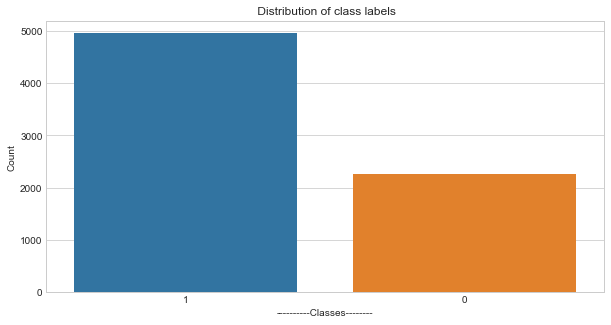

In [9]:
### now let's look at the distribution of the two classes for train set
total = df.shape[0]
count = [sum(df.y == 1), sum(df.y == 0)]
label = ['1', '0']
fig = plt.figure(figsize = (10, 5))
plt.title(" Distribution of class labels")
plt.xlabel("----------Classes--------")
plt.ylabel("Count")
sns.barplot(label,count) 
plt.show()

#### Observation : 
Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. 

### Feature Engineering
 #### Text preprocessing

In [10]:
def fn_preprocess_text(sentence):
    stop_words1 = set(stopwords.words('english'))
    stop_words2 = set('and the was to in me my of at it when were by this\
    with that from there one for is we not so are then day had all'.split())
    stop_words = stop_words1 | stop_words2

    stemmer = PorterStemmer()
    text = str(sentence).lower()
    
    text = text.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")
    text = text.replace("what's", "what is").replace("it's", "it is").replace("i'm", "i am")
    text = text.replace("he's", "he is").replace("she's", "she is").replace("'s", " own")
    text = text.replace("'ll", " will").replace("n't", " not").replace("'re", " are").replace("'ve", " have")
    text = text.replace("?", "").replace("i'm", " i am").replace("what's", " what is")
    
    text = re.sub('[^a-zA-Z0-9\n]', ' ', text) #------------------- Replace every special char with space
    text = re.sub('\s+', ' ', text).strip() #---------------------- Replace excess whitespaces
    
    text = text.split()
    text = [i for i in text if i.lower() not in stop_words]
    singles = [stemmer.stem(plural) for plural in text]
    single = ' '.join(singles)
    return single.lower()

In [11]:
txt = []
pbar = ProgressBar()
z = len(df_data)
for idx in pbar(range(z)):
    z = df_data.Description[idx]
    z = fn_preprocess_text(z)
    print(z)
    txt.append(z)

df1 = pd.DataFrame().assign(txt = txt, y = y)
df1.shape

walk along crowd street hold mum hand elderli man grope butt turn look h7m look away 12 yr old
incid took place even metro two guy start stare
wait bu man came bike offer liftvto young girl
incid happen insid train
wit incid chain brutal snatch elderli ladi incid took place even
walk jorpati saw boy tri t0 take pictur girl n girl didnt know n itel abt repot polish nearbi jorpati
heard indec peopl make indec comment
enter subway dark decid go back suddenli man came amp hold hand amp forc go subway also ask number lajpat nagar subway
sexual invit
poor street light
catcal pass comment two ghastli thing delhi polic intern airport put friend appal protector law enforc airport make someon uncomfort
happen bu public transport broad daylight way colleg bu crowd enough space two peopl stand back back big bag em particular male stand next seat enough space behind noooooo start rub crotch shoulder subtli first obvious made discomfort appar seem get shift insid seat think ladi besid knew go say wo

man felt friend hand genit
public vehicl boy touch bodi
call us local name like chinki
yester even wife com vastrapur nandan baugh way guy motorcycl catcal comment 9 pm sinc strech bopal444 applewood isol request author tri patrol road mani ladi go work come home late till 9 30
boy alway harrass use return home colleg
go home uncl pass hit front move ahead
girl go school sunday boy comment pass depress went home rather go school
mate two men way home school told feel like sex
stake indec messag friend north east
bu stop would board bu three car would pass sometim even follow school
lol happen everyday actual use
like eveteas noth great extent two guy tri follow way back home behav indec
pinch return colleg bu 29c two stop told exactli word english could slap hand full bag back also 29c also pretti crowd even enough space anyth wish stop
come class saw group boy teas girl
group girl us travel public vehicl conductor vehicl teas us
walk road bike came behind pull hand drive full road
tou

boy comment tri grope crowd place
best friend sexual harass neighbor six year old still live next inform anyon
way home school men sit idl whistl refus respond start abus
saw scene mall afternoon girl stand outsid mcd two boy came start comment repli start call actress name start whistl
friend molest neighbour inform parent immedi taken task
come back flat job greater noida two boy follow auto say quothow much charg night quot
realli bad
boy grope stare like hell
men gang stare even pass comment make difficult us use block e main road lead home
whenev friend pass boy sit around start comment sing song etc
left friend place went meet friend ladi welcom nice continu chat put ponograph video play reali made feel uncomfort sinc friend friend
two guy follow friend metro board got stare us throughout
stalk man market street live tri mislead
father brother gopi krishna movi hall ticket counter bit crowdi guy touch girl girl immedi repli shout later guy felt shame backoff
comment ogl catcal so

construct worker along railway line anytim ladi pass nearbi normal comment catcal whistl face sever time
math teacher tri forc tri molest refus get person tuition
touch grope market
group young men sit roadsid everi even 5 p late even
saw guy take pictur losar new year parti villag
guy comment girl
someon felt back dadar station climb staircas stop shout slap
rape park
heard incid know true heard old ladi got rape young teen boy
shopkeep make diffrent face
man came near said breast nice want touch
girl rent flate n live alon thre taht hous owner rape cri n went polish report happend infort hous
school friend comment wrong
crowd street man grope chest twice attempt third time punch stomach ran away
use experi type categori younger veteran citi field avoid issu ogl facial express comment remain unchang year everi place travel local experi categori assault except rape sexual assault avoid rape year simpli never situat could lead learn live like prey anim world full predat
14 year girl phy

boy group start stare whistl
call ask phone number name
friend went parti given alcohol friend got drunk guy took advantag helpless state rape could help later got pregnant due
classroom somebodi use phone sent porn video phone even left note watch someon love
man tri hug girl behind
colleg go shop felt miser unsaf stranger stalk also took pictur incid lyk must stop polic strict rule
sexual harass happen friend mine visit guy ask guy invit hous enter guy close door put music high volum forc bed rape
saw man touch girl privat part insid bu
incid took place even deep cinema market ashok vihar girl come institut attend class boy stand exit start whistl also ask number
happen afternoon even metro
lot auto driver metro station often misbehav talk rude even abus verbal feel unsaf sinc travel alon often due work colleg get late
old man shop comment us buy thing shop
get amut metro station found 2 boy stand outsid metro station ogl pass comment
stare bad intens pass street even face comment te

reach bu stop work head toward home biker pillion rider came along behind tri snatch chain abl deni somehow alon back
walk home school man touch butt
man age father attempt molest park lot littl kid
friendli man invit berth start touch inappropri
touch amp harass verbal
bunch loser weird guy kept tail friend femal shop lulu mall kochi kept follow us floor anoth even enter store went point even tri photobomb us got rid leav mall
colleagu use pass comment well ask go hotel
friend physic abus uncl
comment upon even hour
guy travel rickshaw hhe kept look back wierdli repeatedli
touch breast
field play certain boy start take pictur us
came back school reach home go upstair somebodi age 1823 ask whether compani deliv post build said start climb said innerwar shown act act adjust grope screamt ran away lost braveri confid let fight teach boy child manner let stop india
bu conductor pass bad comment
despit uniform call men sit along road chew khat
realli bad
walk road man comment movement girl

harass
slap man road said dress vulgar manner
two boy comment girl
ogl metro
live jp road near chai coffe previous known barista whenev walk past neighborhood alway see gang peopl stand outsid car park blare music make comment niec stand outsid wait someon boy came got scare also pan dabba next chai coffe see guy sit wall drink public polic know everyth noth scare complain live area
friend went department store rajasthan carri 2 bag good bought 2 men street told quothum utha le aap kano toyquot happen kishangarh near power hous
man kept fall metro elbow even brush breast felt intent
boss alway ask go outsid use take cafe restaur speak nonsens took dulikhel say pay salari
happen student time look dirti manner
happen crowd train mainli bridg
beauti ladi 2426 year harass group boy whistl comment stare n take pictur
go attend durga pooja guy tri touch hand
night group boy conmment
road trip man took pictur vehicl halt
survey carri safec red dot foundat along safeti audit street market mumb

crimin usual chain snatch comment variou bad activ
sexual harrasmemt dadar market
friend mine group ill manner guy comment obscen bodi
auto rickshaw driver pass comment
pictur taken near ashok vihar
stalk leh citi timeeven
teenag boy openli invit girl sex
frequent
2 men stand near tea stall right next hous keep stare whenev wash utensil tap outsid
ogl facial express
grope saket
friend return home work two men start whistl follow us scare walk faster ignor told mother told ignor avoid troubl take differ rout
happen morn time month ago
way shop man next ropad start call ignor
incid took place sector13 rohini friend go colleg morn two boy start comment us
come villag travel crowd bu boy touch girl inappropri mani time girl ignor later aunt came
walk friend guy start whistl us
man caught red hand defil 10 year old man taken polic station lock night includ 10 year old
walk man whistl look back made weird express ignor
mall elev liftman look like way lookinh felt violat know
friend touch bre

morn friend go colleg ratnapark sky bridg encount man suddenli grab breast walk away noth happen
group 4 boy touch bad manner continu bu rout 721 753 821 853
touch grope najafgarh
group guy came start pass comment happen afternoon
old ladi walk suddenli 3 men came push snatch train slap arm ran away
man use follow us everi touch breast ran away
leav colleg morn guy start comment
incid happen bhatbhateni superstor saw girl age 20 approx follow old age man give troubl
man stand besid touch back hand also bad thing difficult describ narainar roadbu
realli terribl
teas girl come school
climb stair person touch butt felt back
touch grope morn
practic go home boy deliber caught hold hand
misbehav
person tottali unknown touch bodi neck waist
eve teas
come back work use laini saba ground rout man appear came straight statrt touch butt see peopl come ran fear life
afternoon three guy initi follow friend thn later saw click pictur know ask guy help us got us phone delet pictur taken
boy start to

twice grope drunk men societi night hour school know react
boy comment girl
incid took place afternoon stare inappropri manner
way buy stuff suddenli man pretend mad walk pass ran woman touch butt laugh ladi felt bad took
abus famili member home
friend sexual harres uncl
plan buy sock even time shop close saw woolen shop thought could get pair sock ask buy pair sock said look beauti want make friend ask hug refus want go gave gold chain tri persuad sex came told friend came threaten guy
step offic buy munch stupid roadsid stranger start pass comment like ownaman leke kidhar ka rahi ho
happen morn
eve teas boy watch film
touch grope comment rajiv chowk metro station
categori select afternoon even
touch board train
night time lot guy saw comment upon ignor walk away
way son class right outsid build hail rickshaw two teenag live build start point made comment laugh ignor second time walk question yell
walk bhatbateni supermarket saw boy teas girl pass
stalk stare grope sexual invit
man ti

comment ogl mean nonverb verbal sexual harass common thing everi girl ignor solut rememb kind thing mention possibl common
biker snatch chain
boy walk stare girl also comment happen even
go fetch water boy whistl ignor
gurl near matern uncl hous harass boy grp girl remain quit took action result gang rape 3 boy die hospit sad news whole societi shameless act
man stand near tri touch pretend check pocket exchang seat friend went littl bit far
inappropri danger behaviour
man cought sex young girl call friend told loc door outsid
guy constantli stalk stare women pass obscen comment ccd connaught place
work hr night journey feel unsaf
15 year old boy year ago stalk group peopl rob cell phone money etc
alon rent room husband night duti somebodi knew person threw stone door scare next told landlord
incid happen near shiv mandir
messag rough word facebook
two friend walk street teas drunk men suddenli caught hand said like polic men came complain blame back us
go friend place notic guy stand 

catcal hour
incid took place bu rout 33 noidabhajanpura bu man staand behind fall uncomfort manner
invit place friend thought go got start say thing start touch refus want forc himelf start cri let go
pedicab cyclist station near red chair yell bayot pedestrian
travel bu guy kept touch harass wrong way
survey carri safec red dot foundat along safeti audit street market mumbai
got issu known senior colleg adhoc professor use ask girl student accept friend request fb sometim go coffe ask come alon cabin discuss thing
walk man pass comment tri touch walk faster
incid touhc grope
man click pictur friend tri catch hold fled
touch wrong way crowd bu
walk ill treat
friend walk toward tuition enter build man came behind grope
teenag girl go toward metro station suddenli car came near boy sit car open window gaze toward awkward manner said quotlet go quot
tri touch morn
man unzip wave peanuts peni crossroad main road plain view
eve teasingno street light
way music festiv saw man remov privat pa

2 clock noon head class chang two buse reach class hurri moreov new citi got bu bu stop bastard walk opposit direct came near utter someth touch front public ridicul cant believ happen terribl shock
friend talk said street pull skirt ran toward hous quickli realli cri talk
group guy chase ogl
comment near rohini west metro station even
jog morn face catcal men park disgust
even 6 pm
continu comment stare stand near metro station underw afternoon
experi girl caught way home club night girl rape group men bush incompet help indec dress say girl rape men took stick insert vagina die miser
realli terribl
stalk street light
two boy stand centr market stalk friend
night board train jammu guy guess worker start misbehav
case male teacher tri offer better mark colleg also case men masturb public
everi time pass street creep peopl especi young guy pass comment ogl whistl take pictur
incid took place night sleep upper deck person next touch appropri place
afternoon guy take friend pictur
chepiro

guy tri grab hand friend forcibl dakshinpuri hblock
eve teas stare
trip chandigarh group boy click pictur
friend walk english tuition man scooter flash
brother law sexual abus sister law rape threaten
comment afternoon hour
raini season mani peopl around someon whistl make sexual invit seem odd somehow manag escap
man car approach offer car ride sat sever hundr meter ahead ask suck dick declin drop desert patch
night girl enter hous rape girl
public vehicl look window man enter sat besid plenti empti seat sat besid lose could feel breath hear comment beauti
teacher beat pupil
happen cinema hall even night
show privat part femal
men walk station sky walk touch walk also touch elbow chest parla station
cousin rape bridg 42 night go shop two men
afternoon whistl comment upon
insid metro male stare privat part girl feel uncomfort
hello 17 yr old girl man follow tuition class home daili scare share anyon u help regard
friend mother vikaspuri f district park saw lewd comment pass boy stand t

colleg fest invit muslim friend usual dress quiet simpli ordinari also wear burkha complain boy pass indec comment whistl
go home work biker tri tp rob
nepal telecom pay bill sister felt urg go toilet ask guard toilet instruct toilet came stand tri catch later complain polic arrest
sexual harass public place
boy flash privat disgust young
go watch movi hall boy pass comment us
walk certain boy start tell love boob want touch
catcal main road
guy kept hand waist start say pathet thing
old man expos privat part near bu stop pass dirti comment
two boy follow return back kathmandu kept talk irrit
stalk touch grop
guy cycl comment indec languag happen near ramja colleg morn
friend uncl use touch inappropri keep pictur phone tab
alway notic thing area even night time mostli
comment
friend near ito bu stop someon comment awkward manner
incid happen twice insid auto halt signal near borivali station right sky walk unabl see men time would swiftli move signal open cross road quickli hit breast 

told boast shapel
get crowd bu man grope chest
come auto rickshaw two guy hide face hand kerchief helmet snatch chain sped could realis situat neck numb second scratch also
harass
stand queue person behind poke behind
around 4 morn go colleg follow boy follow time twice well
touch grope
even observ group boy call name decent one tri misbehav
stare ogl touch indec exposur
incid took place even near prabhu dyala public school shalimar bagh
know girl harres harres class mate use call differ name say vulgur harres let concentr class
north east girl sexual assault
bu group man touch
way metro station man bike pass obscen comment ask come sit bike
comment afternoon
follow offic
walk road alon boy follow comment whistl afraid even walk road start walk fast reach home share mother
street friend bunch guy comment even took pictur
peopl pass bad comment girl dress style
group boy threw water balloon butt
biker touch chest walk pass along bike
incid happen friend mine met man near street live wou

wit incid chain snatch afternoon hour ladi later went polic station file report
travel station colleg 155 bu man stare constantli stare back could shout got bu
continu vulgar comment pass group guy even hour
chat befriend differ peopl facebook made guy send ponograph pictur persuad send mine
need protect senior citizen
7 year old shopkeep remov cloth start touch everywher insert finger privat part senior citizen also tri anoth girl fail
sexual harass bu agra udaipur
guy star well comment
man bike follow take pictur phone
incid took place near khalsa colleg afternoon usual happen travel bu colleg hostel vice versa
mother chain snatch market
sometim feel unsaf travel cst sewri ladi coach fight got physic start harass
girl put insid car peopl save peopl
travel bu man tri touch bodi uncomfort drop bu
boy alway call girl refus go repli satrt follow
way school met boy forc remov shirt start touch
happen 11 pm walk stalk man quickli return pg
guy bike tri grope breast girl sit next rickshaw
p

alway comment travel night friend
even walk comment quotchamak challoquot
comment follow
misbehav
man start whistl comment friend walk street
facial express shown also took pictur
first time two boy motorcycl rode past pass close say babe look hot today near banjara hill rd 1thi often happen walk road hyderabad even
visit aunt place wadala boy area harass form kiss action whistl make feel scare extrem unsaf go
chain snatch
treat badli
sexual invit
incid occur school return school guy bike start follow way build start happen everyday till complain parent
survey carri safec red dot foundat along safeti audit street market mumbai
nonsens guy follow tri follow
even friend earn snatch also threatn later went polic station vain
night outsid grant road station
boy gairidhara area whistl follow tri block way feel scare walk area think place alic restaur chines embassi unsaf girl walk even need street light n polic secur place
boy street tri touch friend alon
gone templ sister festiv realli cro

went triniti boy cheap
sexual invit car pitampura near vip
follow zakir hussain colleg metro station new delhi happen 26th septemb 2013 afternoon
bike follow everi time go nearbi market pass comment
live quarter boy call eyong came harass almost everyday want sexual assault move street met tri undress shout neighbour cameout help
someon whistl
conduct survey worli naka feel unsaf access area congest hous narrow lane dark time men street comment girl feet might someth would even come know
push bu two school boy kept misbehav
diwali 1 uncl sexual harass friend daughter sit pandal made girl sit next touch love
go aunt hous invit function way back home teas boy ran back home
even touch gave bad comment go market
harass home lie tell made angri never want take law hand left everyth god also pray 8th januari 2015
comment metro station uttam nagar dwarka
neighbour tri kiss act though normal
lone road
happen visit male friend hous church friend know togeth start touch becam persist tri grip wa

drunkard tri grope girl bridg
bu conductor tri touch breast give ticket crowd bu
guy comment whistl
friend mine grope man ride bicycl
even
idl young men like comment shool girl dress everyday pass alway say walk like qeen
sister touch man bu
whistl
pass toi market men follow go
harass
touch grope
teas someon bu
guy tri intent take advantag crowd bu touch girl good see peopl take notic someth
walk crow road teenag boy came near tri dash
harass school trip male friend
parent went funer left alon boy came hous start touch scream
continu comment stare travel metro even
girl walk makina stage came across group men sit next berber shop call great ignor start insult
teacher beat pupil buttock
comment catcal
teacher beat student
neigbour mine abandon 6 children husband man final gone met anoth childless woman sign marriag certif court
man sit next elbow continu got fed left auto
male touch
grope train bandra dadar first class compart
went market
man fight wife come home drunk wife ran away rap

husband take care famili provid basic need sinc work depend
incid took place metro afternoon guy stand next metro comment group girl stand nearbi forc friend ask
guy comment happen even
boy local teas sing whistl
attempt rape
comment ogl upon dilshad garden kashmer gate metro station
see road lot boy comment girl
comment ogl
realli bad
come back colleg heard boy whisper amongst laugh look girl pass
walk tuition guy bike touch sped
misbehav
wake road guy gave sexual invit urin
around 1213 year old travel state transport bu parent due rush bu parent seat differ seat away sit differ seat man earli 30 came seat next start gener convers ask class told mention someth mental instabl problem sometim ladi hold babi stand next offer ladi help hold babi ladi hand babi soon took babi hand insert anoth hand tshirt sleev grope breast shock happen also scare even tell parent pretend noth happen rememb stori clearli even almost 12 year
guy call tri snatch chain ran away
boy said bad comment girl walk 

friend verbal abus boy
ride scooti travel around would feel earlier mayb ride scooti would eve teas much clearli wrong recent ganesha visarjan notic men stare take excus traffic tri get close friend even normal day find rickshaw driver stare wear skirt rise even wear indian wear still stare lone road car drive behind kept honk even though road empti
salesman ogl tri grope dlf emporioeven 7 30 pm
travel panchpakhadi area thane station tuition ride bicycl man follow bicycl constantli tri speak want know name want know whether ride rout everyday time ignor noth could want rush tuition
happen stadium three girl came infront harass told sex dress sexual gentleman refus
afternoon street walk small brother guy comment dress feel unsaf
classmat tuition class took pictur without knowledg later look phone found pictur mine
salesman kept stare insid store also came store follow
sister go home work truck driver pass dirti comment drunk took uturn took longer rout back home
head home school saw gro

bu
friend return school three boy start follow us pass comment well tri take pictur
electr home sleep terrac boy multiplex behind hous comment
stare
friend way colleg taxi reach destin driver touch wrong manner start flirt ask mobil number
comment
way home micro bu unidentifi boy use filli word point toward disappoint
incid took place rajiv chowk metro station morn around 11am stand line wait metro come two young guy start whistl laugh train came got women coach
seen boy stalk whistl girl
girl travel public vehicl unknown person touch said come deni go later start blackmail say go end rape lastli went
chain purs got snatch
push public vehicl an eve teas
face differ type verbal non verbal sexual harass differ place like public transport templ other
boy tri touch anoth girl privat part
parti fest guy start take undu advantag crowd start touch us
sixteen year old girl rape group four men nubian celebr
tea tea stall men kept ogl pass comment among
walk someon tri touch bad manner
ogl grope

man call school girl whistl girl ignor went
return school group boy teas dirti facial express even comment
beaten regularli husband especi drunk
nangloi railway station happen
wait friend boy ogl
crowd bu man touch back inappropri
misbehav
boy cross metro station wagon r went whistl pass comment
incid took place afternoon ask oral sex
go home night drunkard teas
walk biker pass comment
stare outsid gate 5 saki naka metro station wait cab happen multipl time
travel back home bu colleg man took seat next first didnt realiz anyth wrong start stick even put hand thigh got took anoth seat
follow comment quotkya boob gainquot quotmaal lag rahi haiquot
night friend travel auto driver took unknown place luckili found help save
number men car follow car took video pictur also stop car call us
saw gang boy teas group school girl although alon still afraid
gang boy tri touch
guy metro stand behind zip open masturb
happen dtc bu travel chattarpur vasant vihar boy contin comment misbehav girl
2 men

happen time birth right comment
girl sexual abus grope public holi
rape sexual assault even
guy sit behind bu start sing song direct
stalk eve teas touch grope
young man shout whistl girl pass tell beauti
morn guy keep call shout name go colleg refus go wit movi
boy seat stage whistl sister make comment bodi structur
follow guy colleg bu stop usual go
follow
way school often face teas boy
cross sarojni nagar subway night amp drunken man follow amp comment upon
walk even talk phone suddenli guy hit hand walk away group friend
come back colleg boy start take pictur start comment metro station
misbehav
guy purpos grope metro stop
go class boy follow home till class bike say quotgiv number friendquot
girl go road suddenli person came start say lewd thing realli discomfort girl
night extrem poor streest light unsaf cross ground
touch micro bu
sexual invit girl
even boy comment
return class guy said indec word victim
walk infront kathmandu mall street boy show privat part
walk toward church 

gone morn walk wear top text written boy pass front read text loud start laugh happen 67 month back
even 5 30 pm
guy pull scarf bike
whistl near wadala
metro civil line guy click pictur check phone mani vulgar pictur gave phone secur guard take strict action happen 17th august 2013 even
catcal
incid took place februari afternoon vulgar comment pass regard costum inter colleg competit
touch prime hour busi spot andheri station person pass rickshaw simpli touch breast ran away sat disgust dumbfound rickshaw signal couldnt even see face dont even know hate time point
walk boy teas sing song
young go parti famili member public vehicl adult sit next stare us got afraid ran famili member
12 year old girl
phone stolen
touch grope afternoon
guy crowd bu rub femal bodi
incid took plae modinagar way home wherein underw worst situat life pass street two biker came obstruct way nd start pass lame comment beyond imagin awstruck seceond jitter mind rang parent sinc hous far away father note vehicl n

closer mumbai kalyan mental challeng 14 year old boy sodomis 4 men shave eyebrow head burn privat part cigarett butt forc unnatur sex parad road later accus beat father dissuad approach polic fourth accus person still abscond toi mumbai edit say sexual assault rampant
go buy veget two men come blink eye shake tongu
man snatch chain train
friend forc sex toilet
board last paper crowd person touch back
comment touch girl bad manner
inappropri comment catcal whistl dtc buse
go home alon without friend travel toward gwarko peopl bu whistl gave facial express
travel bu conductor harass
boy studi 9th standard saw two girl fight caus boyfriend click photograph upload facebook also sexual harass
teacher beat student
complet slum area fill drunkard drug addict amp area lot murder report day bewar go next sea amp could thrown sea tortur help
accid road poor street light rough road
guy travel rickshaw kept look back weirdli repeatedli
bike two boy sstalk friend like 510 minut last went polic men 

happen friend mine wait open forev 21 saket felt someth touch bodi behind 5 min turn back see middl age man unzip pant
man stand schoolbu build wall north avenu santacruz west masturb expos pretti dark wall bu enough bush hide watchmen 1012 feet away initi unclear owe dark becom evid call watchmen ran away disturb kid live build around also right busi arteri lane link sv road complet lack fear discoveri busi locat also disquiet goe show even seemingli highli unlik tini seclud spot becom opportun
walk alon road man came behind touch shout abus word ran away
friend mummi chain snatchin hui hai
travel bu crowd old man touch hip time left bu
happen sunday afternoon around 6 month back market mom boy constantli follow scare could even tell mom later mom insid shop start beat boy mom look saw beat boy
walk river bank dirti look man follow us show us privat part
walk friend mine saibaba coloni pretti residenti area man bike wear helmet grope ride bike frozen gone swift street dark even note v

rough road traffic problem
indec exposur masturb indec comment whistl jostl touch other bodi
saw girl wait someon tri call person meantim came three boy teas well tri touch
person touch wrong place travel bu way home
morn happen
teas comment
walk escal got grope man stand behind
young girl defil old man stay noth done
man sit bench listen radio comment said love pass embarrass moment
touch old man microvan
age 19 yearstyp harassmentfaci express leh market time stalk leh market time catcal tuition time leh time
neighbor rm nagar use vagu languag shout creat nuisanc foul amp bad bodi languag
even boyfriend comment quot humara bhi haath pakad loquot
group men two motorcycl follow auto kept come side stare us kept ignor got eager kept circl auto till final pull went ahead
way back work men around darajani grab touch breast
man whistl pass uncomfort
stare
purpos tri come close touch talk crap
go husband offic fellow came ask favour bike show scare said noth went sinc today got site thought 

ill treat bu n road
grope metro station kanhaiya nagar
follow amp tri come closer
woman stand bu touch boy uncomfort manner felt mani time slap boy
comment hoot passer
stalk
take pictur
boy eveteas upon group girl
friend come church met old man call friend help opper phone friend went assist find man want watch porn video phone
bag snatch riksha happen lot
touch grope
middl age man open zip crowd metro teas touch girl genit girl along men shout caught hold man beaten bleed profus apologis hand metro author
entri exit bridg malad station start end near men public toilet alway crowd men stand also path main road kind compound morn even boy men stand stare everi girl pass pass comment make weird facial express postur sing song brush women pass
gang boy tri rape return home night time howev manag escap
boy screamt train happen coupl time
misbehav
friend rape tuition teacher
chain snatch
chain snatch incid happen near hous stop go hous
report submit safewatch
indrajatra someon grab back
cha

way school friend stop man start touch breast ran away fear horrifi
boy unknown boy touch
motorbik number bla 463 tri assault juhu gone toward andheri
misbehav
walk road boy comment whistl
wit harass delhi mani time mani incid actual describ action taken male around irrit part
two year ago return home town villag boy follow hous forc give number week keep follow hous
incid took place satya palac street even come tuition guy cycl whistl pass comment
chain snatch
girl colleg got harass morn
man spank aquamagica way saw
live laxmi baug sion shop along stretch station road right upto entranc chawl muslim shopkeep jungle boy throughtout lane shivar guest hous often stare dirtili pass filthi comment happen everyday incid face us girl area even ladi understand author station polic booth area realli danger popul hooligan pleas help outsid sion station tunnel toward shivar guest hous go toward laxmi baug
touch grope chanakyapuri
man pretend drunk start touch girl privat part claim know
go parlo

travel bu crowd pick pocket tri snatch bag later ttold everi everyon shout ran away
usual peopl sit idl comment girl
friend mine sit auto rickshaw share long time felt someth poke breast area assum man umbrella kept quiet find later hand shatter
guy use follow month feburari use travel coach class
sexual abus concert unknown person grab breast tight afraid
harass
step mother beat make carri 20 litr water beat sufuria small girl mani bruis neck face
40 year old man tri touch travel form kathmandu banepa defend pinch hair pin
saw group men seat togeth call ladi pass school
bu satya niketan anand vihar
person stalk
get back home wednesday market even dark alreadi way back home saw man stare could figur happen snatch chain ran away
walk friend women meet pass nearbi pub man look window start call friend invit go bottl warn man concentr busi avoid admir peopl wive
survey carri safec red dot foundat along safec audit street market mumbai
home town hyderabad waz walk cousin somebodi came ask 

guy comment iw asgo home
guy ask give money
mother caught rape rasta dam site
goin colleg group boy comment dress style
comment touch grope
go market time two three boy teas girl girl realli seem scari sweat also follow girl walk fastli boy stop follow end go home big issu time
happen kid dont rememb much touch badli happen even
14 year old man tri touch privat bodi part name play hide seek
young girl 17 year sent buy night way back stop gentl man moment ask lover refus decid harass girl
harass train
bu karol bagh boy stare us inappropri manner happen even around 6 month back
experiec chain snatch incid area safe anyon due improp light
crowd bu guy touch act mistak kept
four girl walk saw boy approach us began cal us ignor start insult
even travel even wear simpl tee jean guy lecher eye turn back till time comment start touch
saw man tri touch woman breast insid pack public bu
noth much happen still secur concern
happen anoth passeng harass dress wear two guy pass comment
travel back h

group boy follow us ask us number
comment pass group nearbi ticket counter
outsid metro station auto rickshaw valla stand liter hold peopl hand let sit vehicl
rain 800 p stranger gave lift sat behind two men pass alight point ask loudli mouth cover two men rape drop kangemi
heard lot man say bad vulgar word public place even tri touch bodi part whistl
incid took place even year ago person expos privat part invit sexual activ person car stop direct sit nake car
walk men say boy stare comment happen even
teas badli boy street
boy touch felt bad go outsid home
outsid shop wait someon man came behind touch comment someth walk away
harras even
conductor tri tri touch bodi girl insid micro bu
travel crowd bu guy stand close tri make attempt touch inappropri defend move forward
man follow us andheri station bandra station
harass afternoon
lane chawl narrow boy stand outsid lane give way women pass pass comment sing song well also group boy pay carom road
follow man
enter metro someon touch bu

stand queue ride boy stand behind take advantag push forc tri grope
children ridicul older boy make fun regard dress sens financi condit
sexual invit friend
father wait mum left earli market defil
call chinki charact less 2 men road
often even nearbi men guy hangout shadi area often cooment stare
morn 1000am travel bu man behind continu tri bring face near face hand
continu comment whistl sit alon wait friend morn hour
auto three guy came bike snatch friend bag process fell move auto becam unconsci hit head could rememb anyth
walk ride scooter peopl comment us
walk colleg guy startedfollowinhg
walk rider stare whistl come close etc
go lone street two boy comment quotooo bhai bhut jyada garmi ho gyi hai quot vulgar tone
go aunt hous alon bu came man start talk ignor first talk rude complain aunt bu scold
two boy tri lure gave cosmet item take pictur public vehicl
go back place stalk guy shameless came place mum open door said want marri daughter even know beign stalk regularli polic int

crowd place 1 person said someth disturb quotchut chatn degiquot sinc crowd place peopl push could react instantli time realis happen alreadi left otherwis also know would react even still stand
walk toward olymp stage take bu men work weld shop strted talk low tone turn look
go school morn give exam mani peopl around man came nowher start pull skirt start shout kick slap ran away felt humili skip exam went sat park alon
comment gone buy milk nearbi shop
night 10pm pervert continu stare check girl
ground near indira nagar comment whistl ogl
2 girl danc suddenli 5 guy came amp start touch amp abus rpm vasant vihar
touch felt man
group guy whistl ogl comment take photograph without muy concent
friend stepmoth care much brother use assault mother knew still say anyth friend stood shout front societi serv 6 month jail time
man kept stare bu station took auto left
gang boy come hous gairidhara area rob hous show knife loot jewelleri money etc
ill treat
boy tri touch girl couldnot thing
grou

group person sit car follow rickshaw tri talk girl sit rickshaw pass loud comment
random guy touch breast walk roadsid
gone nss camp 7 day use travel school morn everyday came across bengali buzi mobil walk girl notic take pictur complain author went speak later public gather phone check confess took pictur leg chest part etc start hit men later even file complaint polic station phone taken custodi
person train tri hold lot crowd could help chang place stand
girl sexual harass dirti south night happen room victim serious harm taken hospit good heart peopl came time
lack convey improp street light
misbehav
follow metro
girl teas boy comment leav work
boy tri touch girl public bu
wait metro guy stand behind comment stare
girl follow bu stand upto home comment know total unknown pass bad comment alon could fight back
travel micro person tri touch girl
beaten snatch everyth includ book mother deni food sent away mother
physic harass amp sexual invit
need go mri scan rel upsana hospit need 

gone market eat someth sister even way back guy start follow us ran home told mom blame us invit upon
lot crowd guy felt friend
go work saw man neighborhood approach ask name refus block way kept stare push went away
stand friend eat ice cream group boy came pass us went littl far stop start stare us minut left place
bu man purpos fell touch inappropri excus
comment whistel afternoon
survey carri safec red dot foundat along safec audit street market mumbai
went meet boyfriend colleg group men stand near gate colleg probabl find attract follow till reach class wherev colleg happen whole follow even pass comment bodi shape
wit 9 year old girl get wink 22 year old
guy pass hideou comment girl dress pass nearbi took place even metro pitampura
friend stand somewher model town saw somebodi click pictur although sure click pictur express made quiet clear
due natur victim job make come home late ocass gang boy corner beat rape collect phone purs recognis search boy luck
chain snatch guy make a

girl shiksyadeep colleg go hous sathghumti bato road long peopl around come near hous 5 street boy rape helpless time
girl teas go home
call new age chhokra citi tendenc accumul near lake side street kick two wheeler vehicl ridden peopl especi women
harass lane commun cloth also pull
morn bu boy stare continu 2 hr
face person whistl give oddlook walk lane
eve teas near mc donald sector 14 dwarka
girl came back morn walk harres old man bridg
man stand middl road masturb
pinch return colleg bu 29c two stop told exactli word english could slap hand full bag back also 29c also pretti crowd even enough space anyth wish stop
wait bu found 2 guy stand littl far first act click selfi point got know click pictur quickli move away
boy reurn home school girl comment look
guy whistkl
touch someon inappropri zanskar sani nasjal
happen 20th may went even enjoy sudden two guy came forc direct scare follow reach hous forc sex guy
even agroup boy comment girl make non sens thing
go colleg morn guy star

two boy whistl girl pass
follow
group men comment friend climb stair metro station
guy make appropri express
well sexual harass mostli common girl rare happen boy girl main victim sexual harass never harass friend harass level 200 student uidb buea come back school around 8pm happen street near hous
2 men tri grope sunday market start shout hand went crowd could see
friend sexual harass walk street man felt
sinc girl train honda plant everyon use stare
left hous work sat rickshaw notic guy smile look like belong villag nearbi initi didnt pay heed got sanpada stn saw smile look toward day chang time use wait night know got know exit time offic
street sunday even follow luckili shout ran away
rickshaw boy pass comment tri touch
way home guy follow ask make friendship start run start run behind scan whole build search
girl went help self forest stranger nowher tok knife ask scream rape
whenev friend goe market even two boy keep whistl pass comment bodi cloth happen near kamad 2 road stree

dmrc even two guy pass bike whistl loudli
girl stuck even car broken guy approach pretend help happen worst nightmar could imagin
go shop buy groceri item even time boy follow comment know feel scare move away
guy touch friend inappropri even
ride scooter ride side big bu came wrong side driver laugh take danger thought die moment face type incid sever time ride scooter ride scooter safe kathmandu
afternoon go home guy whistl
guy tri touch inappropri long distanc passeng train mumbai kerala
friend told us incid school way stop guy held wrist start ask kiss
man came close friend bu touch privat part
around 5p colleg return back toward metri station came across drunk boy take pictur mine comment feel unsaf travel alon
pass coridor gatwekera man nowher stood touch breast sya good suck felt uncomfort embarass
misbehavior boy pass vulgar comment girl
man sing obscen song
rape seen 12 midnight girl found nake
watch tv cousin hous friend came suddenli cousin friend start touch got ran
even ha

happen friend get back shop men approach start misbehav comment ask sexual favor happen rajhan vihar afternoon
boy comment figur
go mosqu men start call shout tell quotuko sawaquotmean cute
man touch inappropri bu
scooter red red light micro bu conductor touch upper bodi part pass spontan could even react
stare unnecesarili comment wierd stuff
catcal whistl comment ogl facial express
follow
poor light bandra station dark unsaf night
walk olymp road men idl outsid movi shop stare girl pass pass well pstare
two guy tri block path tri touch
sister go market two chain snatcher came bike snatch gold chain
harass midday
villag hardli get electr whole night would electr villag forget street light villag remain total dark night unsaf girl
man follow till hous
ogl comment
matern uncl home friend tri harass touch unnecessarili even click pictur
misbehav
boy sodomis father
woman rape rober go work earli
sexual harres ladi travel micro bu
way back church xma eve girl saw walk saidquotwil like sex 

friend walk lane man call name teas
tri touch hair comment beauti
chain snatch
friend mine go walk near northern ridg area somebodi start follow felt uncomfort start run escap
follow written horrif experi 23 year back quotteri chut lene maza aa jaegaquot said mayb fault never known mean repli quotmar ja jakequot voic quiver everi sharp exchang word later quit time thought better respons could given quotpolic ke pass chalega mujh bhi maza aa jaega quot quotquot well thought still abl put word suddenli given glimps would feel like rape victim probabl would clichd say suddenli felt expos everyon around could see indiffer mani eye around knew happen middl road broad daylight pleas note still speak like rape victim saw mother daughter probabl 810 year old gap 1m made feel insecur want shout mother grasp daughter hand hold close suddenli understood mother protect knew still somewher around watch love get high reaction caus thought made lighten didnt want give satisfact look around cheerili w

make facial express amp stare continu awkward way also face physic harass
friend hit shoulder full forc guy motor bile miss balanc fell broke mobil
best friend molest local train
elder sister walk street guy follow us scare start walk briskli whistl also start walk briskli hurriedli went crowd hide slowli crowd stop safe
return home metro station two boy bike touch behind could anyth sped away
forc
chain snatch
touch ogl
old man pass young girl tri touch girl
abus word
incid took place morn sector 13 rohini walk colleg pg boy group comment us
daytim way kapan bu man age around 30 next bu crowd person intent bad sat side start touch
lot harass take place near area girl harass peopl roam around knive
boy age 15 year attempt theft bike due live monitor cctv boy captur send polic custodi
girl short skirt stand bu stop men start call name make run
6 30 walk toward bandra station complet dark seem road suddenli someon caught back touch near crotch turn saw man scream fright shout abus ran op

travel dtc bu 253 use travel everyday boy board bu brj puri bu stop start stare contin stare irrit got irrit decid also start stare soon start stare give tough look becam consciou got bu
got toi market makina stage way man accident knock forehead use elbow sorri said fine follow held waist still tell sorri told ok iremov hand waist held waist hold tighter struggl pull walk away quickli
friend harass boss reput compani kiss forc without
happen famili step father abus physic year
girl deepli depress boy school use teas obes person could stand fact tri commit suicid counsel well
travel girl friend bu halt somewher min break roam take pictur suddenli man expos bodi start wave toward us embarrass move ahead month date locat approxim
n sister return home boy start teas us littl drunk n smoke ciggrat 510 boy start take pictur 2 follow us escap run fastli
continu sexual invit travel mostli happen afternoon
snatch chain near mandir
man ask possibl go told time
alon home religi teacher show crot

comment
teacher told us prayer bring 50 peopl per student parti boy class told shake
woman rape laini saba never taken hospit
return home school follow boy made scare
man fallow pass comment
touch man insid bu
harass
stand outsid colleg bunch cheapster sit front us whistl comment
happen friend moharram near mosqu man much older tri touch inappropri
morn 10
given sexual remark
tri touch breast
hyatt mohammadpur subway safe
age 19 yearstyp harassmentstaringogl choglamsar leh time stalk leh main bazaar time catcallswhistl hous coloni leh time sexual invit ye even
jhangirpuri metro station saw boy take pictur girl without permiss
saw group boy start follow old ladi worn lot ornament show knife snatch ornament ran away
bu often
notic old man follow near hous
walk convent junction guy suddenli walk pass said quoti wanna fuck youquot sing song manner subsequ walk past without stop occur almost 57 year back approxim 5 pm date time given exact
way colleg boy back comment teas throw stone shout 

guy continu stare afternoon hour
poor street light
boy near home give facial express
man bike indec expos front girlfriend happen 2011 morn report polic beat
particip crisscross citi road late night hour found mani stretch road includ arteri road like j road mani road streetlight either dysfunct dim fail illumin road pavement poorli lit mumbaibangalor bypass infam road mishap
auto riksha driver amp friend abus girl street
went shop store unknown girl ask cell number
way home local guy teas tea shop
wait bu bu stop man came near said spend night even follow 30 minut
touch sensibl area bodi
boy taxi adjac mine turn start pass lewd comment laugh
go grant road bu bu stop felt touch felt scare left bu fast could
happen dtc bu man came sat next kept come close constantli kept push hand away kept come close say crowd side get push
touch also facial express
conductor stare often inquir
purs gold jewelri snatch
come back class man scooti came besid show peni look toward move away scooti open zi

guy touch friend leg wait
go shop man chew khat got hold hand forc tri grab fortun woman warn
ogl
happen quit number time walk friend even 23 boy bike whistl us
area govandi toward deonar municip coloni west near 600 tenement build evacu dark night time unsaf women girl come home offic even also street govandi staion west toward tata nagar alway occupi hawker everybodi feel unsaf walk road auto rickshaw drive rashli amp 51 peopl front polic man nobodi bother safeti area
boy follow us make loud nois disturb us even follow us
go school boy follow talk rubbish
21 year old colleg go girl live sion difficult scari affair almost everyday anytim danger place exactli outsid station underground bridg subway time light dark underground besid exit underground bridg walk toward shivar guest hous alway huge group men includ shop keeper sit along wholesal cloth shop go toward bmc quater make lewd remark also make sexual remark sometim even attempt unwant contact wors case wit action ever taken fix g

travel two daughter bu mani peopl bu man came stood next elder daughter start rub arm got push
guy got metro kirti nagar sat besid suddenli start sing song look toward friend kept look reason talk us ask next metro station name etc call name get metro comment cloth also kept bump us intent
friend die hiv aid rape
shopkeep took girl photo saw confront
man first comment tri touch
go friend hous boy play foot ball ball came near came boy near get ball tri hug shout
area get photocopi around 4pm bunch guy kept whistl n make obscen gestur
man make weird kiss sound road
boy comment
follow us home market way make comment
way baba dogo clinic peopl sit along road hawk item stare peopl get even surpris leg walk quickli becom week laugh abl walk
wait metro 2 guy look start comment dress look
incid took place even two biker came bike snatch rs 17000 old ladi gun point
foot bridg trap sometim know wit indec exposur worst bit incid happen less ten second walk across foot bridg near kasturabai mrt s

peopl follow way back home return job place market barnala punjab could report area surviv whole area report might gone away later creat problem us
come across fool vagabond almost everi place delhi colleg life pass indec comment whistl indec manner show vulgar gestur make person girl embarrass consciou
poor street light unsaf area near metro station
friend person start comment us
morn 2 men make nonsens drama front us take 100 rs us
guy pass filthi comment ask happen night
travel harass go anywher happen night around month back
young school children bulli outsid
survey carri safec red dot foundat along safec audit street market mumbai
comment ogl pictur taken night
aman tri touch appropri
300pm road quit silent boy bike snatch chain ran away
travellingin bu bu visit rel person frm bu tri talk n tri come close n tri touch shout n told got bu
girl spank butt walk could speak guy smile walk away
girl 14 rape
10th grade home class past 10 drop friend live lone area take turn lane least 5 

comment pass near commun toilet group boy also stare
friend call men start touch
girl walk street boy touch ran away
chain snatch near kapashera border
man drunk place near place chef women go
walk street mind busi suddenli boy start whistl
incid happen friend go aunti place bu stop
ladi assault neighnour husband strip nake bthroom went ahead que
guy comment girl
stare us alway even invit us car
girl stay step mother father father brought brother 12year alway rape girl night sleep te boy sleep chair
uttam nagar termin bad boy comment onth peopl whomsoev goe special girl
guy comment girl
guy make catcal indec facial express
lost phone wallet
happen friend brother graduat immedi neighbor tri sexual abus escap inform parent big major incid prevent alert
walk home suddenli group boy touch person area
festiv season night time friend beaten gang boy
walk pratap nagar toward hous attend aakash coach class guy start follow made vulgar comment stop signal cross road notic tri take pictur thank 

guy comment cheap
usual get whistl unnecessari facial express travel public vehicl colleg home vise versa
say go school noth instead wast parent money
friday sport school friend go home met boy gogo call friend ignor start abus
man walk street laini saba wear silver chain familiar are boy came statch chain neck ran away
poor light condit area give rise mani petti crime girl societi
hi follow incid happen twice walk back home walk lane adjac kasarvadavli naka lead toward thane muncip garden side 8 10 pm boy pass toward direct walk stop check right face drove ahead gave firm rude look get verbal fight lane lit peopl pass surpris thing dress salwar kameez occas alert cheap liqour shack prior hawar residenti project via lane walk boy head direct mean either belong slum nearbi head chill liquor shack alert two place ahead liqour shack desert notic rickshaw driver local boy frequent place liqour consum open seen road get spilt two direct hawar proect head valley like place desert polic need 

guy caught hold hand walk even also encount lot comment catcal
due lack street light difficult go alon 8 mani passerbi take advantag
harass
incid took place rajiv chowk metro station even pass station toward platform noida citi centr saw behind toilet area comment catcal took place
afternoon 1 30 pm
group misbehav
friend go school earli morn bu man sit besid friend show privat organ felt awkward difficult got bu
follow group boy
chain snatch
man work factori near workplac use follow auto regularli
go fetch water near home white man came pull touch breast manag escap
boy caught unknown men sodomis threaten knife
come mother palc work met boy influenc drug greet will respond made start cali prostitut
yesterday dat 9 03 2013 scooti travel granni home way two boy van start follow tri teas drive vehicl parralel scooti scare till 10 km follow
whistl teas visit place
boy bu pass bad comment group girl say thing figur cloth
men follow forc give number gave mother number
hous owner pass indec c

happen road even wait auto time group boy pass nuisanc type comment
friend got invit femal colleagu sex
stalk day
come home work man street ask sit car go
man first comment pass touch inappropri
3 guy tri sexual abus friend
wit chain snatch abus situat wherein woman push away abus also chain snatch ran away could stop
walk home take groceri patch road connect pramukh vihar societi main road time 0740 pm 2 person bike pass make comment time came back pass comment tri touch shout ran away
night guy call friend call home tri rape ran away mental trauma
boy start masturb front us
sent father pick sister school man stop amp tie kiss ran away
boy sell mandazi morn call whistl girl go school
boy whisl go home school felt bad could react
man shout friend appear go market
follow 5 boy kept laugh pass comment
follow
men drink alcohol woman came man begun open button touch breast
guy bike
incid took place krishna nagar market afternoon friend forc car gangrap
ladi go back offic place even heard s

gotten bu kibera tout tell size tell bedroom size
four year ago form three friend mine come back school attend preep even school read 5 pm reach central market former c c banana plantat two men came plantat held drag bush rape abandon later discov three day
shangrila resort grope men pool hit wave lost balanc drown
harass afternoon hauz kha villag
follow boy
guy use stalk kept pass comment whenev saw stay satyaniketan si could avoid
comment catcal whistl touch
near tuition center shop would buy stuff class guy would alway time would pass comment cloth
head bandra wait train man blcak shirt stare right us quit time shamelessli click pictur us
even chain phone snatch
cat call jeer
come church friend reach dc ground certain man strted call us refus hurl insult us
happen monday even unfat wit sexual harass boy girl boy girl stand street hous suddenli pass front saw boy touch girl bad way girl shout boy leav alon greatest supris turn behind saw girl alreadi nake floor guy nake
jaipur famili

wear short walk near armi area raini road desert 3 guy bike stalk comment even tri assault alon helpless
whenev girl pass especi even hour guy alway comment whistl
walk around market shop mg sister random stranger pass spoke ear say quotkya matak rahi haiquot
group boy use abus word
get back home uttam nagar east metro station follow two men bike street light around
rush tri catch train near virar west railway station boy came front bang hurri catch train tri take advantag situat luck good stop give tight slap arrog twist palm shout take polic station time realiz becom panic want wast time left behind walk way
four five recent event violenc abus public reaction merit comment first amaz distinct drawn mani languag use insid parliament outsid let begin unreservedli condemn defenc minist khwaja asif comment opposit leader shireen mazari voic rhetor request make voic feminin use term truck trolley moham hanif insight piec subject correctli identifi remark hark patriarch expect everyth woma

touch andheri station
touch inappropri
afternoon friend group guy continu comment upon us tri touch us
live hous guy call room canopi show someth got close door start plead sex refus insist 30 minut seriou refus later open door
friend went outing boyfriend valentin group guy teas friend boy friend went oif place without word
young girl 9th standard play street residenti area bunch friend man possibl late 30 earli 40 ride scooter came close moment realiz zipper trouser open possibl stroke full view group 34 teenag girl shock hurri hous minut silenc realiz occur vow take registr number vehicl next time happen never got chanc
boy whistl friend go home
men road stare
boy school dress pass comment
two person came bike threw water balloon wet complet
lil si alsway harassr school frm teacher tell mother n complain school n school restig
wait station guy behind start get closer kept brush hand waist arm first tri move away continu immedi gave look told straight away
visit place bhaktapur bu su

touch grope amp hit
harass
cross road mother 2 guy pass comment wait bike gave us look went away
even phone stolen
street light avail point road near open ground sec3 vasundhara point id depriv streetlight unlik type point area moreov n nubmer poor resid slum set local make condit even pathet area get dark creepi night due frequent accid unwant incid take place poor live highli affect alway live fear risk mishappen take place point time night
wait metro kashmiri gate group guy start comment behav weird manner embarrass
happen ridg near north campu morn man indec expos buck group femal runner morn
happen friend gym trainer work gym
sexual invit girl wait cab pickup offic hour mg road indec coment amp play laser light
seat ground dc offic group f men also sat stare passerbi make differ utter especi ladi
two men tri share rickshaw said would like sit exit men start say would like sit near thank auto driver allow board auto
comment touch amp bad facial express way back dwarka sec1 dtc bu 7

drunk guy tri harass move local train
gone visit cousin stay night arriv area follow disappear bent
boy abus girl
night boy comment
friend mine sexual harass beach
friend harass even around 6 month back someon held hand
night low street light boy whistl follow
return shop alon subway find group biker way feel scare
girl know rape street murga chowk stop go area alon
survey carri safec red dot foundat along safec audit street market mumbai
teacher harass girl touch privat part
guy make inaapropr express
man tri touch weirdli shout ran away
boy drunk start misbehav
happen school girl return home school crowd bu men tri touch privat part
girl walk two boy follow start teas cri felt helpless boy stop teas
4 us wait bu stop particular bu someth irk someon watch us turn side see man show privat part smile blood ran insid much anger told cousi elder said avoid helpless public man went shame ful work immedi bu came board
misbehav boy
comment
walk way saw two boy whistl comment girl walk alon s

go new baneshwor touch unnecessari stranger
happen girl drop bu reach call two boy come greet boy boy ask greet boy tell girl privat part disappear greet boy follow boy beg girl becam afraid boy ask surend give possess money phone chair bangl collect girl start cri help peopl could come rescu boy excap
neighbor famili husband beat wife
sure rumour true institut girl accus professor molest return id card back say snatch id card back ran inform friend famili complain
girl walk district park saw somebodi click pictur treid hide face boy still captur 2 3 pictur complain old man sit park phone taken away uncl hit hard
elderli woman advanc sexual young man refus report polic fals claim harras
morn hour wit ladi chain snatch guy bike report polic
boy keep follow night ask escort shop
usual back hostel local guy call chines
class boy tri touch inappropri
use medic like himalaya product like muscl relax oil ayurveda privat part reveng 1995 mother brother big issu finger auto stand
minor person 

two biker snatch chain ladi near jnakpuri metro station happen morn
felt unnecessari touch around privat organ sever time public vehicl area feel uneasi public vehicl
night sleep got phone call around 1230 pm got frighten receiv call think might sort emerg urgent call receiv call came know bluff call man talk want know hung phe continu call n disturb whole night
face friend due work bad experi
teacher bad intens student touch us sit bench
two men park lot kept stare go toward car kept ogl made realli uncomfort glare back giggl
sexual invit hoot
girl rel uncl night girl uncl touch girl asleep small take action meantim mother enter room saw activ done law care societi fill complain way save daughter
teas go school come back school local boy bhatbhateni area
name conduct survey guy touch girl indec manner north campu outsid metro station
comment khayala new delhi18
girl boyfriend continu cri guy hurt hand badli happen even
ogl travel bu
mani incid experienc want write happen year ago girl

peeopl touch also comment
girl rape mile 14 dibanda got pregnant realis man involv cult
guy use comment sister way tuition
ill treat
boy stare
boy usual roam around place pass bad comment girl whistl etc
dtc bu cpchandni chowk experienc indec exposur touch prod
indesc exposur total nake man ladi compart strip insid compart
boy stare friend
two guy motor cycl snatch chain ladi get rickshaw
stand around 8 pm bu stand guy stand comment ignor
guy continu comment girl metro gener coach afternoon hour
men comment friend
boy chew khat whistl way home school
use cale name left school home name like beauti
girl pass buy near group men men start call girl never paid attent men told cheap girl
neighbor abus child three month scare could tell anybodi
market friend boy stare us start comment etc
notic group boy alway sit along railway line wait pass call name whistl
afternoon yamuna bank station lot touch
group boy use teas friend pass differ comment
peopl road haress colleg girl
child abus
wa trav

go home school lone even group grop boy n whistl n sing n ask name
travel rickshaw man tri grope breast
policeman misbehav state bank india took place 5th octob 1115
comment
call girl come along could identifi bike helmet age around 35 could ask help around less pedestrian movement around 345 p rais voic left
catcal
age 15 yearstyp harassmentfaci express school leh 2016 time take pictur leh market 2015 time catcal school leh 2016 time
even somebodi comment
travel train nagpur chennai men kept follow stalk regular interv
wait cab boy continu star
girl came school met man kidnap end rape
boy sit far away friend kept say someth girl haiderpur villag stand balconi
call name villag zanskar
happen even
friend teas man handl station bridg cross way back home night way back home colleg near mulund help ran away didnt speak day later spoke
go colleg boy pass comment us
middl age mad start masturb stare sinc first time happen yell loud ran away men gather tell bambaiyya languag quotwoh hila raha

halt car young guy stand right next window stare car told shopkeep pass tissu paper guy decid grab tissu paper realli tight stare eventu pull hard abus quickli pull window
beach walk man repeatedli came clash
school girl pass men group start call anger sosh start exchang word
walk along coridor certain man nowher approach told admir back long
comment ogl facial express
stand outsid gym alon wait driver pick late time contin chase group boy stare till time driver came
got whitsl comment guy
harass
group teaser near beach
ogl comment
scare way home two boy comment ogl
touch grope due poor street light
teas friend go visit teas us
friend bu guy start sing song stare us continu made us quit uncomfort pretend speak uncl polic
incid took place noon comment pass metro feeder driver
comment grope near metro station daytim
eve teas indec exposur
wit whistl girl okhla mandi afternoon pass
whistl
guy even time make almost immposs walk road
crowd area someon touch privat part turn back could find 

girl famili get harass unknowingli brother law call meet meet behav dread start kiss naughti silli thing make girl feel bad cant rais voic famili prestig
friend two guy came bike person sit back touch friend ass
danger
girl almost rape hous thief came neighbour steal girl save came take school shoe intend report polic
happen even
girl live coloni stalk 34 guy almost everyday coloni signific popul ia offic ip offic jurist etc
friend mine femal rape dirti south buea 10pm night went transfer credit return held guy took uncomplet build rape
metro station bad gestur ignor
misbehav
man tri touch privat part escap
realli bad
matatu go town conductor ask money stretch give touch mhi breast
conductor tri come close travel nashik mumbai
touch grope
happen travel bu colleg morn drunk man got bu two femal friend accompan man got stairng us cruel way report conductor rather make get shift place amp person sat right behind us atlast got bu option left amp passeng travel along
went market two boy sta

dombivili famili consist middl class categori famili peopl travel toward mumbai main citi livelihood henc daytim especi afternoon women elderli children home henc make home peopl vulner increas number theft chainsnatch instanc afternoon women bring children home school thiev becom brazen keep watch societi snatch chain within societi compound
harass
chain snatch karol bagh
near jewel shop even
friend chain snatch street
catcal ogl gtb metro station even
stalk
defil someon know well told go hous pick cloth chair came start touch breast tele give anyth want
molest woman bike husband group car
guy stare made vulgar facial express
friend boyfriend alway black mail tri physic relat
ye sexual harras mani time life like random guy tri touch sens part group guy whistl diffrent facial express
gener coach metro toward jahangir puri person touch back side
3 guy bike start howl start sexual invit busi street
chain snatch two peopl bike wrong side afternoon around 34pm
return back home group boy te

know coupl gone get marri guy stab templ knife ran away know case
sir board school tri assault
happen even
boy basantapur jatra tri touch time time
silent street saw girl taken cab harrass
girl go colleg mani guy road start take pictur teas comment rough word afraid go colleg kind abus peopl
comment
happen morn
work field coordin around year back man follow ask contact detail
middl age man teas inappropri
group boy whistl said differ thing friend felt embarrass
man ran away purs riksha red light
man follow station home whistl whisper ear quotcharmingquot leav
friend place friend father tri touch inappropri
happen afternoon even
group guy comment
touch grope afternoon
night gulbarga foreign went visit shoe shop owner shop got obsess take even though told want go insist pick hotel close time around 2230 told go late left hope would find stay told hotel pleas tell anyon live hotel someon ask anyway 2230 call recept told wait told wait anyon tri call half hour constantli also came door tri

cross bu stop chain got snatch men could anyth
olymp stage wait bu men idl start call tell come sah hi
go home school two boy tri rape
ogl facial express comment
guy take pictur scold happen afternoon
puja guy approach mom friend start talk suddenli snatch chain could react left place
boy privat bu comment girl
walk toward hous old man drive car stop right side look ask get car
friend two guy came bike person pervert sit back touch friend butt
sister pass alley boy whistl stare comment dress way walk
touch grope
stalk drunkard scari ran crowd place make safe
person sit ladi seat ask seat start misbehavior
school friend hatigauda area boy took photo
chain snatch
man shout car friend walk
return home friend saw 4 boy harass girl touch unlik show nude pic mobil
victim follow group boy also made indec facial express pass obscen comment
area realli unsaf night
friend attend even school way back home sexual harass bike man seriou could go home incid found morn came harvest tomato farm found 

girl pass guy whistl comment upon happen night
chain snatch
happen walk alon boy teas vulgar word
touch
mani incid grope public transport
way home colleg seclud area
travel metro man took full advantag grope touch privat part
2 school boy pull hair outsid school said dirti thing
even travel metro disgust touch person even back sour
comment
2 school girl move way group young boy walk opposit side girl way among boy tri pull skirt
guy dtc buse take pictur ladi bu
went pragati maidan trade fair guy touch grope surf stall though incid occur frequent almost anywher delhi
friend walk street group boy start whistl make inappropri comment
walk new place alon follow stranger helpless afraid got idea pretend talk phone know
harass morn
group boy wistl said rubbish word
late even go nearbi market alon buy provit strang middl age man lean short come toward saw pass know turn back saw look came behind wait shop enter becam nervou call boyfriend sinc much nearer dad happen time till fake take pictur

bu heard men make comment look behind see
teacher beat student head
incid took place 25th septemb 5pm west gate mall park area group boy stand car park area comment whistl everi girl pass side
misbehav
cat call wink
way quiet lone peopl even bu stop taxi driver stand peopl walk even 8 road
tri sexual harass waitung platform friend
man use pretend urin behind flat man could take privat part whenev saw ladyin cook area behind flat often peopl complain landlord came fenc round flat
misbehav
group boy momo shop kept stare butt laugh
friend pass street group boy comment us say look beauti girl come
happen near virat cinema go back home men stand corner pass comment touch inappropri ran away start follow pretend like aunti walk nearbi rel call bhabhi scare men went away later told aunti happen 16
group guy drink near ill lit area stare contin
bali vaccat famili came hotel prior famili want click pictur car driver say quot love fuck indiansquot furiou went back hotel cheap mental ruin fun tri

(7201, 2)

In [12]:
df1.head()

txt  y
0  walk along crowd street hold mum hand elderli ...  1
1    incid took place even metro two guy start stare  1
2     wait bu man came bike offer liftvto young girl  1
3                           incid happen insid train  0
4  wit incid chain brutal snatch elderli ladi inc...  0

### Spliting a Dataset in Train , Eval ,Test

In [13]:
def fn_tr_ts_split_clf(df_Xy_, ts_size = 0.2, rand_state = 63):

    df_Xy = df_Xy_
    df_X, y = df_Xy.iloc[:, :-1], df_Xy.iloc[:, -1].values
    sss = SSS(n_splits=1, test_size=ts_size, random_state=rand_state).split(df_X, y)
    tr_idxs, ts_idxs = list(sss)[0]

    return tr_idxs, ts_idxs

In [14]:
def fn_tr_eval_ts_split_clf(df_Xy_, eval_size = 0.2, ts_size = 0.2):

    idxs_tr, idxs_ts_ = fn_tr_ts_split_clf(df_Xy_, ts_size = ts_size + eval_size)

    df_tr = df_Xy_.iloc[idxs_tr]
    df_ts_ = df_Xy_.iloc[idxs_ts_]

    idxs_eval, idxs_ts = fn_tr_ts_split_clf(df_ts_, ts_size = ts_size/(ts_size + eval_size))

    df_eval = df_ts_.iloc[idxs_eval]
    df_ts = df_ts_.iloc[idxs_ts]

    return df_tr, df_eval, df_ts

In [15]:
df_tr_, df_eval_, df_ts_ = fn_tr_eval_ts_split_clf(df1, eval_size = 0.2, ts_size = 0.2)

In [16]:
df_tr_.shape, df_eval_.shape, df_ts_.shape

((4320, 2), (1440, 2), (1441, 2))

In [17]:
df_tr_.sample(5)

txt  y
4405                              train delhi rewaricom  1
5876      bike rickshaw go back home look comment badli  1
813             person touch sexual organ public vehicl  1
6827  go town found group men sit iddl pass start wh...  0
1567                             guy comment stare girl  0

In [18]:
df_eval_.sample(5)

txt  y
7134  even road less light old man follow till gate ...  1
5224                pass boy start say like tight dress  1
4001           follow 15 year old boy skywalk vile parl  0
5216  guy resid near charni road night incid wait fr...  0
2059  guy bu purpos stick privat part girl common bu...  1

In [19]:
df_ts_.sample(5)

txt  y
6785                       sir board school tri assault  0
1905  two guy came stood near start pass cheap comme...  1
3840                         ogl facial express comment  1
2396  way home met group boy carri girl tri scream h...  0
7095  incid took place friend around 6 month back fr...  1

### tf-idf vectorization


In [20]:
def fn_tfidf(corpus, max_feats = 500, n_gram_range = (1, 1), to_transform = []):  

    kw = dict(max_features = max_feats, ngram_range = n_gram_range)
    tfidf_tranformer = TfidfVectorizer(**kw)
    tfidf_tranformer.fit(corpus)

    to_transform = [corpus] + to_transform  
    transformed_Xs = [tfidf_tranformer.transform(corpus) for corpus in to_transform]  

    return [*transformed_Xs, tfidf_tranformer]

In [21]:
tr_corpus, eval_corpus, ts_corpus = df_tr_.txt.values, df_eval_.txt.values, df_ts_.txt.values
to_transform = [eval_corpus, ts_corpus]

kw = dict(n_gram_range = (1, 1), to_transform = to_transform)

tfidf_tr, tfidf_eval, tfidf_ts, tfidf_transformer = fn_tfidf(tr_corpus, **kw)

### Listing out  important word

In [22]:
def ten_important_word(tfidf_data):
    
    importance = tfidf_data.A.sum(axis = 0)
    imp_words_idxs = importance.argsort()[::-1]

    imp_words_idxs = imp_words_idxs.flatten()

    imp_words_idxs[:10]
    d = {v:k for k, v in tfidf_transformer.vocabulary_.items()}

    columns = [d[k] for k in imp_words_idxs]
    columns[:10]
    return columns , imp_words_idxs , columns[:10]

In [23]:
columns , imp_words_idxs , ten_word_tr = ten_important_word(tfidf_tr)
ten_word_tr

['comment',
 'touch',
 'boy',
 'guy',
 'girl',
 'man',
 'friend',
 'bu',
 'even',
 'harass']

In [24]:
a,b,ten_word_eval = ten_important_word(tfidf_eval)
ten_word_eval

['comment',
 'boy',
 'touch',
 'guy',
 'man',
 'even',
 'friend',
 'girl',
 'harass',
 'happen']

In [25]:
tfidf_ts_word,b,ten_word_test = ten_important_word(tfidf_ts)
ten_word_test

['comment',
 'touch',
 'boy',
 'man',
 'guy',
 'girl',
 'friend',
 'even',
 'bu',
 'tri']

### Word in to feature

In [26]:
df_X_tr = pd.DataFrame(tfidf_tr.A).iloc[:, imp_words_idxs]
df_X_eval = pd.DataFrame(tfidf_eval.A).iloc[:, imp_words_idxs]
df_X_ts = pd.DataFrame(tfidf_ts.A).iloc[:, imp_words_idxs]


In [27]:
df_X_tr.columns, df_X_eval.columns, df_X_ts.columns = columns, columns, columns

df_tr = df_X_tr.assign(y = df_tr_.y.values)
df_eval = df_X_eval.assign(y = df_eval_.y.values)
df_ts = df_X_ts.assign(y = df_ts_.y.values)


In [28]:
df_tr.head(3)

comment  touch       boy       guy  girl  man    friend   bu  even  \
0  0.407756    0.0  0.428979  0.000000   0.0  0.0  0.485443  0.0   0.0   
1  0.000000    0.0  0.000000  0.213958   0.0  0.0  0.000000  0.0   0.0   
2  0.203483    0.0  0.214074  0.000000   0.0  0.0  0.242251  0.0   0.0   

   harass  ...  hard  spot  attempt  think  question  signal  may  file  \
0     0.0  ...   0.0   0.0      0.0    0.0       0.0     0.0  0.0   0.0   
1     0.0  ...   0.0   0.0      0.0    0.0       0.0     0.0  0.0   0.0   
2     0.0  ...   0.0   0.0      0.0    0.0       0.0     0.0  0.0   0.0   

   stori  y  
0    0.0  1  
1    0.0  0  
2    0.0  1  

[3 rows x 501 columns]

## VISUALIZING FEATURE IMPORTANCE:

In [29]:
def fn_feat_importance(df_X_tr, y_tr):

    f_ratios, zzz = f_classif(df_X_tr, y_tr)
    f_ratios = pd.Series(f_ratios, index = df_X_tr.columns)  

    return f_ratios.sort_values(ascending = False)

In [30]:
def fn_corr_matrix(df_X_tr, f_ratios):

    zz = list(f_ratios.index)
    df_corr_mat = df_X_tr.corr(method = 'spearman').abs()
    df_corr = df_corr_mat.loc[zz]
    return df_corr.loc[:, zz]

In [31]:
def fn_filter_feats(df_corr, thresh = 0.8):

    dff = df_corr.copy()
    collect_good_feats = []
    cols = list(dff.columns)
    while True:

        col = cols[0]
        s = dff.loc[:, col]
        ss = s[s.values >= thresh].index
        ss = list(ss)
     
        dff = dff.drop(ss)
        dff = dff.drop(ss, axis = 1)
      
        [cols.remove(i) for i in ss]
        collect_good_feats.append(col)
        if len(cols) < 2:
            break
    return df_corr.loc[collect_good_feats].loc[:, collect_good_feats]

In [32]:
def fn_plot_corr_numerical(f_ratios, df_corr, figsize = (15, 7), fontsize = 15):


    plt.figure(figsize=figsize)

    plt.subplot(1,2,1)
    f_ratios.sort_values().plot(kind = 'barh', alpha = 0.6)
    plt.title('FEATURE_LABEL_CORRELATIONS (anova - f - values)')
    plt.xlabel('Degree_of_Correlation', fontsize = fontsize)
    plt.xticks(fontsize=fontsize-2)
    plt.yticks(fontsize=fontsize-2)

    plt.subplot(1,2,2)        
    heatmap(df_corr, annot=False, cmap="YlGnBu")
    plt.title('FEATURE_FEATURE_CORRELATIONS (SPEARMANS)')
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=0, rotation = 0)
    plt.tight_layout()
    plt.show()

In [33]:
def fn_feat_select_clfn(df_tr, n_feats = None, plot = True,
                             thresh_feat_label = None, 
                             thresh_feat_feat =  None,
                             figsize = (15, 7)):
   
    n_feats = -1 if n_feats == None else n_feats
    
    df_X, y = df_tr.iloc[:, :n_feats], df_tr.iloc[:, -1].values
    f_ratios = fn_feat_importance(df_X, y)
    
    df_corr = fn_corr_matrix(df_X, f_ratios)
   

    if thresh_feat_label == None and thresh_feat_feat == None:
        best_feats = list(f_ratios.index)

    else:
        df_corr = fn_filter_feats(df_corr, thresh = thresh_feat_feat)
       
        f_ratios = f_ratios[df_corr.index]
        f_ratios = f_ratios[f_ratios.values >= thresh_feat_label]
        best_feats = list(f_ratios.index)
       
    
        df_corr = df_corr.loc[best_feats].loc[:, best_feats]
 
    if plot: fn_plot_corr_numerical(f_ratios, df_corr, figsize = figsize)

    return f_ratios, df_corr, best_feats

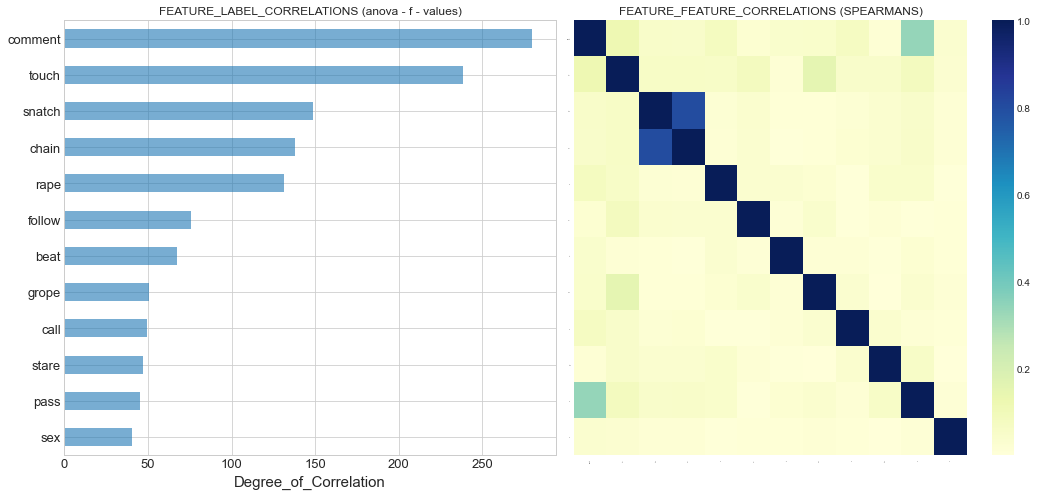

In [34]:
f_ratios_, df_corr_, best_feats_ = fn_feat_select_clfn(df_tr, 
                                                            thresh_feat_label = 40, 
                                                            thresh_feat_feat =  0.9,
                                                            figsize = (15, 7))

### Kde plot for best feature w.r.t target for training dataset

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='comment', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='touch', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='snatch', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='chain', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='rape', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='follow', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='beat', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='grope', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='call', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='stare', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='pass', ylabel='Density'>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='sex', ylabel='Density'>

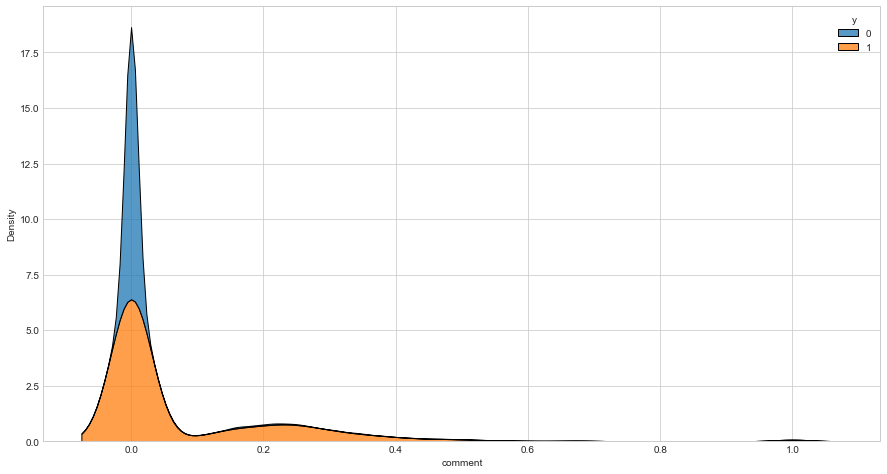

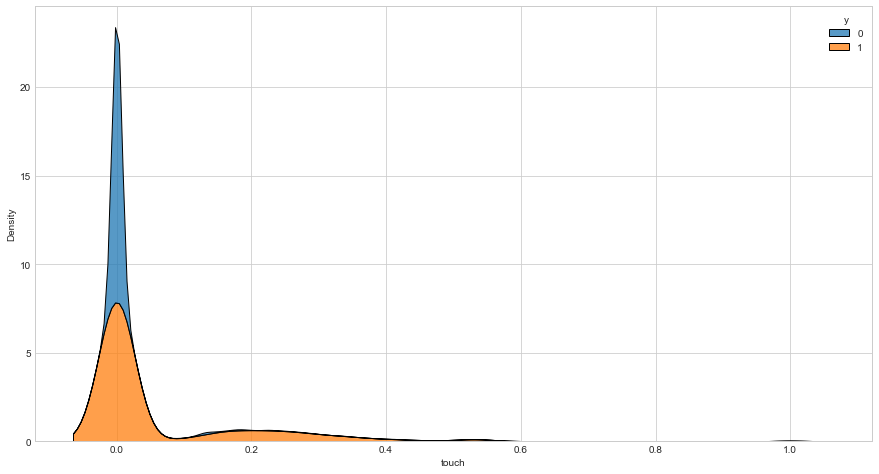

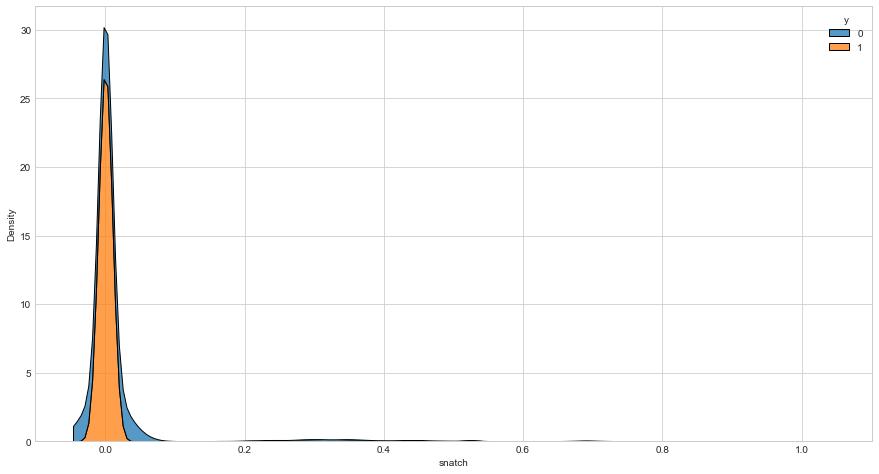

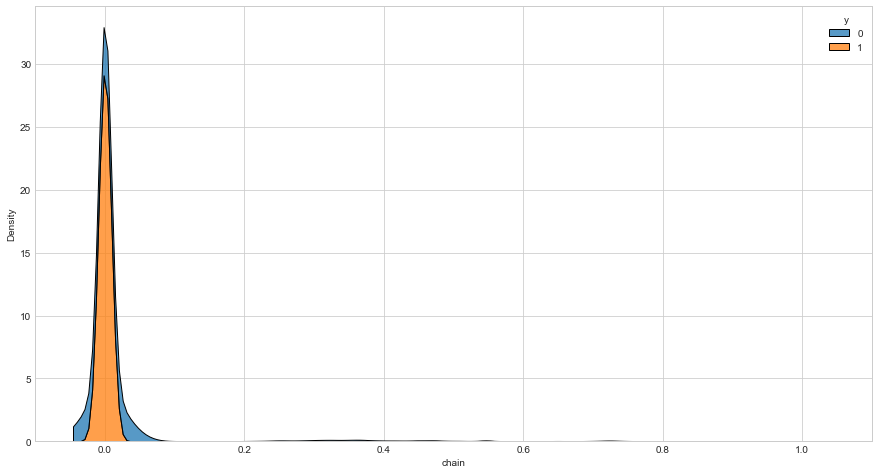

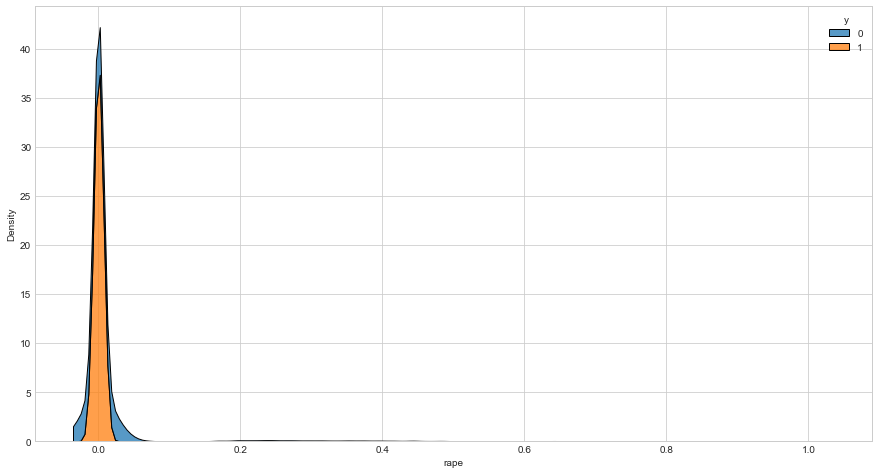

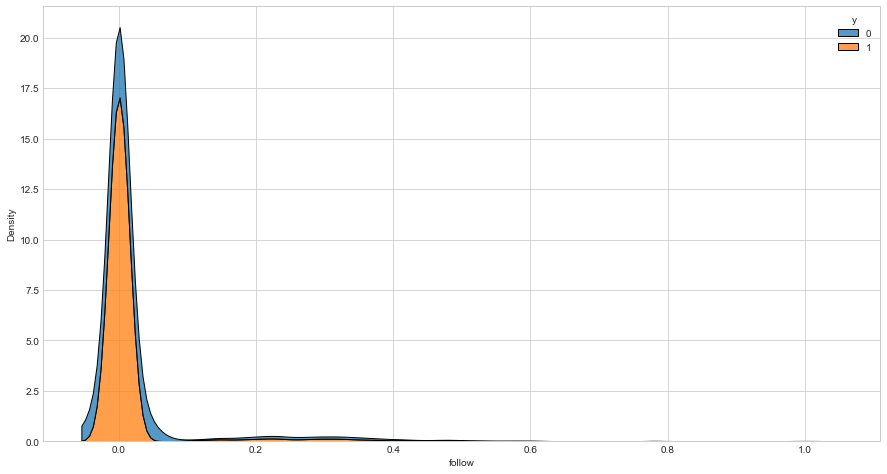

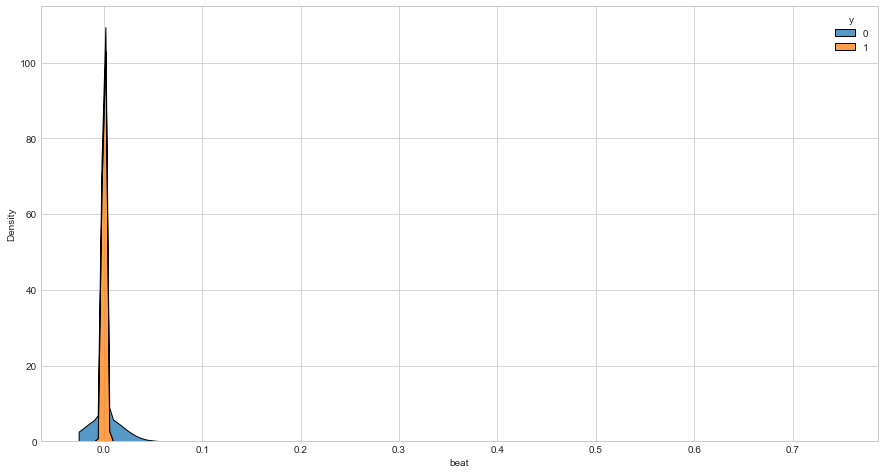

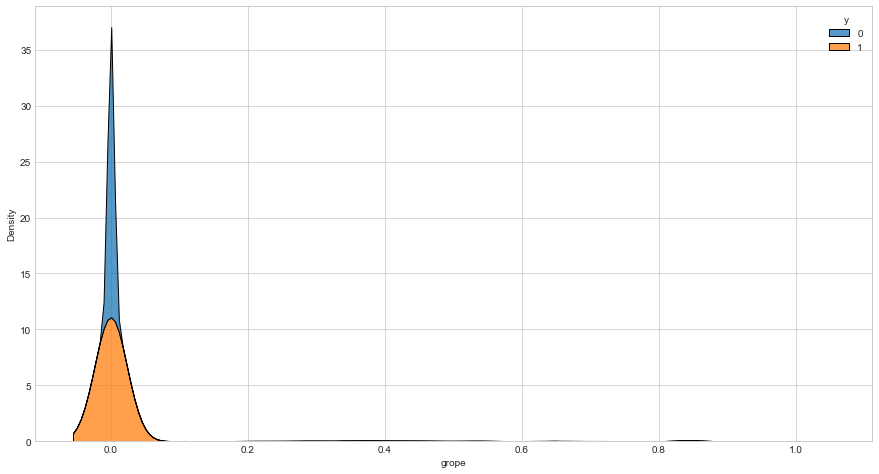

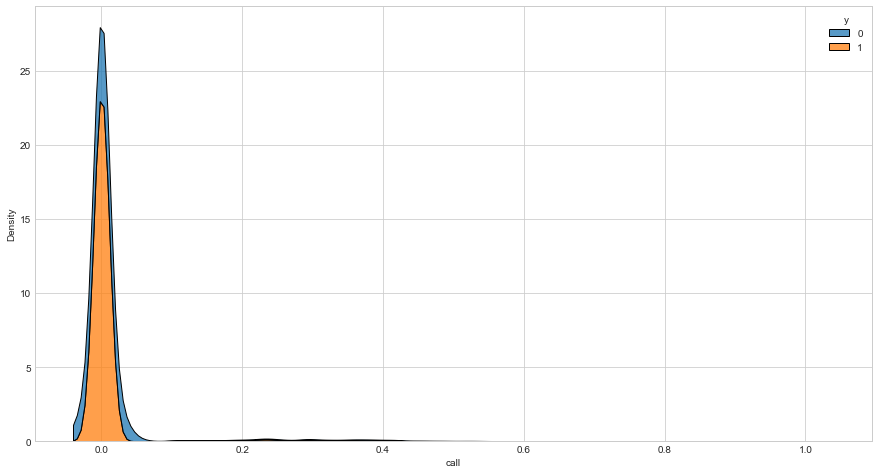

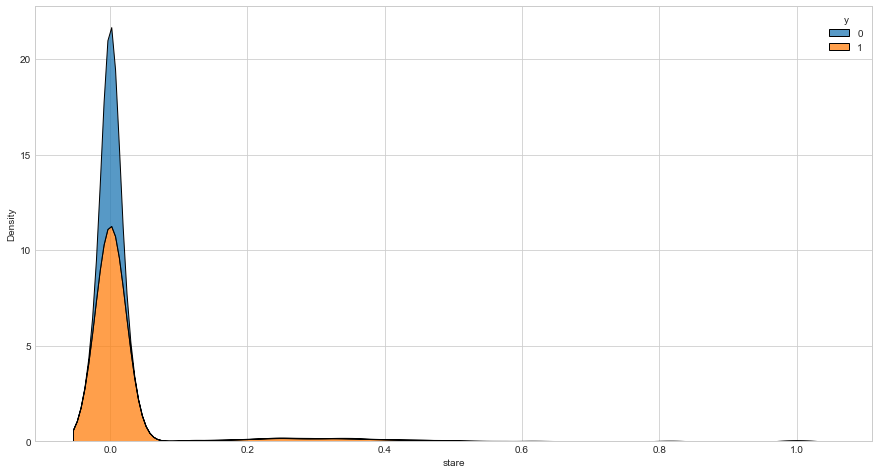

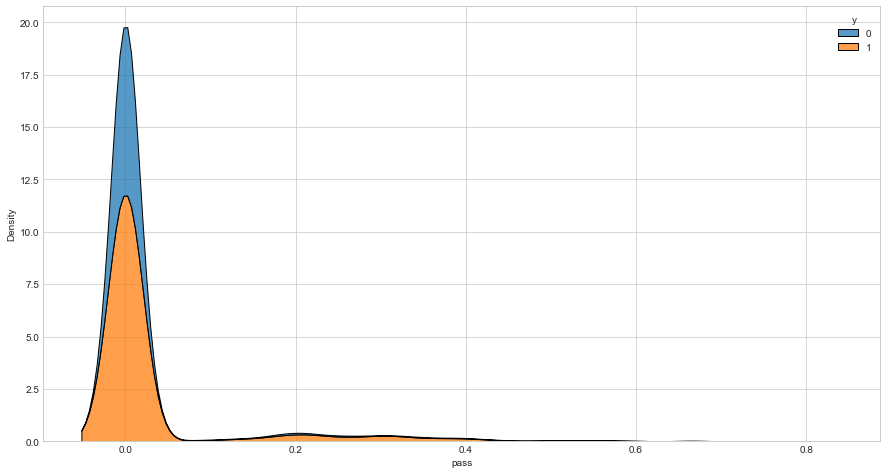

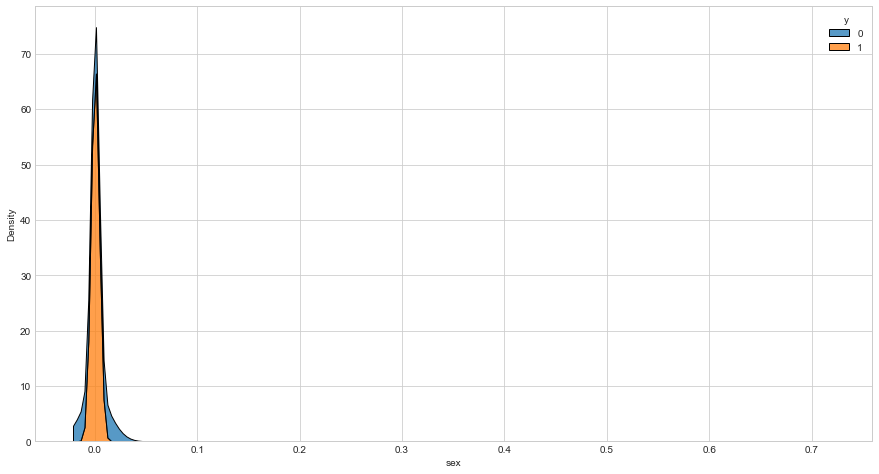

In [35]:
for i in best_feats_:
    plt.figure(figsize=(15,8))
    sns.kdeplot(data=df_tr, x=i, hue="y",multiple="stack")


## Logistic regression

### TRAINING

In [36]:
def fn_param_grid(param_grid_):
    return ParameterGrid(param_grid_)

In [37]:
param_grid_ = dict(penalty = ['l2', 'l1'],  
                            C = [1e-25, 1e-15, 1e-3, 1e0, 1e15],
                       solver = ['saga'],
                     max_iter = [30_000],
                 random_state = [0])

param_grid = fn_param_grid(param_grid_)

In [38]:
def fn_train_models(X_std, y, model_class, param_grid):

    X = X_std
    trained_models = []
    pbar = ProgressBar()
    for hyp_params in pbar(param_grid):
        trained_model = model_class(**hyp_params).fit(X, y)
        trained_models.append(trained_model)
    trained_models = pd.Series(trained_models)
    return trained_models

In [39]:
from sklearn.linear_model import LogisticRegression

model_class = LogisticRegression
X_tr, y_tr = df_tr.iloc[:, :-1].values, df_tr.iloc[:, -1].values

trained_models = fn_train_models(X_tr, y_tr, model_class, param_grid)

100% |########################################################################|


In [40]:
trained_models

0    LogisticRegression(C=1e-25, max_iter=30000, ra...
1    LogisticRegression(C=1e-25, max_iter=30000, pe...
2    LogisticRegression(C=1e-15, max_iter=30000, ra...
3    LogisticRegression(C=1e-15, max_iter=30000, pe...
4    LogisticRegression(C=0.001, max_iter=30000, ra...
5    LogisticRegression(C=0.001, max_iter=30000, pe...
6    LogisticRegression(max_iter=30000, random_stat...
7    LogisticRegression(max_iter=30000, penalty='l1...
8    LogisticRegression(C=1000000000000000.0, max_i...
9    LogisticRegression(C=1000000000000000.0, max_i...
dtype: object

## EVALUATION

In [41]:
def fn_acc_prec_rec(y, y_proba, thresh):    

    y_pred = np.array([1 if i > thresh else 0 for i in y_proba])
    dff = pd.DataFrame().assign(y = y, y_pred = y_pred)
    
    TP_1 = sum([1 for i in dff[dff.y == 1].y_pred if i == 1]) + 1e-6
    FP_1 = sum([1 for i in dff[dff.y == 0].y_pred if i != 0]) + 1e-6
    FN_1 = sum([1 for i in dff[dff.y == 1].y_pred if i != 1]) + 1e-6
    prec_1, rec_1 = TP_1/(TP_1 + FP_1), TP_1/(TP_1 + FN_1)

    TP_0 = sum([1 for i in dff[dff.y == 0].y_pred if i == 0]) + 1e-6
    FP_0 = sum([1 for i in dff[dff.y == 1].y_pred if i != 1]) + 1e-6
    FN_0 = sum([1 for i in dff[dff.y == 0].y_pred if i != 0]) + 1e-6
    prec_0, rec_0 = TP_0/(TP_0 + FP_0), TP_0/(TP_0 + FN_0)
    
    acc = (TP_1 + TP_0)/len(y_pred)  
    
    F1_Measure_0 = (2 * prec_1 * rec_1) / (prec_1 + rec_1)
    F1_Measure_1 = (2 * prec_0 * rec_0) / (prec_0 + rec_0)
    return acc, prec_0, prec_1, rec_0, rec_1,F1_Measure_0,F1_Measure_1

In [42]:
def fn_performance_metrics(y, y_proba, listO_thresholds):
    
    listO_metrics = []
    for thresh in listO_thresholds:

        acc, prec_0, prec_1, rec_0, rec_1,F1_Measure_0 , F1_Measure_1 = fn_acc_prec_rec(y, y_proba, thresh)         
        listO_metrics.append([acc, prec_0, prec_1, rec_0, rec_1,F1_Measure_0 ,F1_Measure_1, thresh])

    df_performance_metrics = pd.DataFrame(np.array(listO_metrics))  
    df_performance_metrics.columns = ['acc', 'prec_0', 'prec_1', 'rec_0', 'rec_1', 'F1_Measure_0','F1_Measure_1' , 'thresh']
    df_performance_metrics.sort_values(by = 'thresh')   
        
    return df_performance_metrics

In [43]:
def fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, 
                    class_, listO_thresholds = np.linspace(0, 1, 10).round(2)):

    df_metrics_tr = fn_performance_metrics(y_tr, y_tr_proba, listO_thresholds)
    df_metrics_eval = fn_performance_metrics(y_eval, y_eval_proba, listO_thresholds)

    if class_ == 1:
        tr_prec, tr_rec = df_metrics_tr.prec_1, df_metrics_tr.rec_1
        eval_prec, eval_rec = df_metrics_eval.prec_1, df_metrics_eval.rec_1
    if class_ == 0:
        tr_prec, tr_rec = df_metrics_tr.prec_0, df_metrics_tr.rec_0
        eval_prec, eval_rec = df_metrics_eval.prec_0, df_metrics_eval.rec_0

    acc_tr, acc_eval = df_metrics_tr.acc, df_metrics_eval.acc
    
    subplot_grid = (1, 2)
    fig, axes = plt.subplots(*subplot_grid, figsize=(10, 4), sharey = True)
    axes = axes.ravel()

    axes[0].plot(listO_thresholds, tr_prec, label = 'precision')
    axes[0].plot(listO_thresholds, tr_rec, label = 'recall')
    axes[0].plot(listO_thresholds, acc_tr, linestyle = '--', label = 'accuracy')
    axes[0].set_xlabel('thresholds')
    axes[0].set_title('TRAIN - ' + 'class_' + str(class_))
    
    axes[1].plot(listO_thresholds, eval_prec, label = 'precision')
    axes[1].plot(listO_thresholds, eval_rec, label = 'recall')
    axes[1].plot(listO_thresholds, acc_eval, linestyle = '--', label = 'accuracy')
    axes[1].set_xlabel('thresholds')
    axes[1].set_title('EVAL - ' + 'class_' + str(class_))

    plt.legend()
    plt.tight_layout()

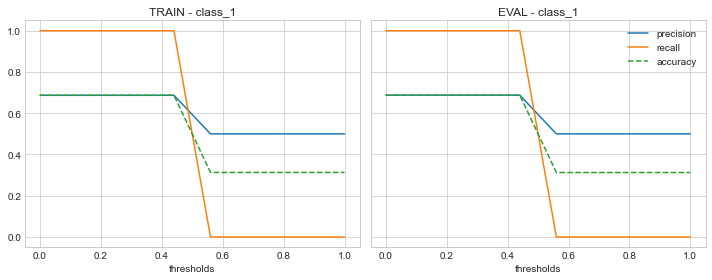

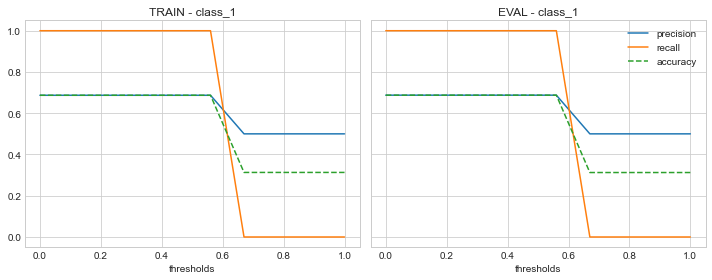

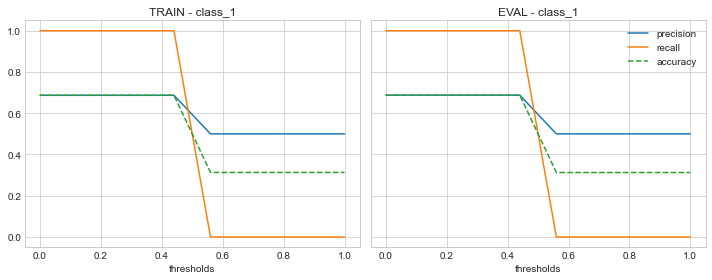

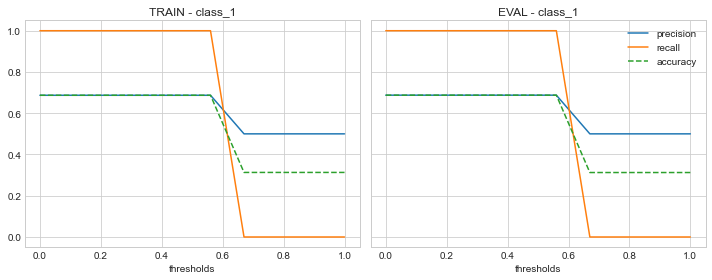

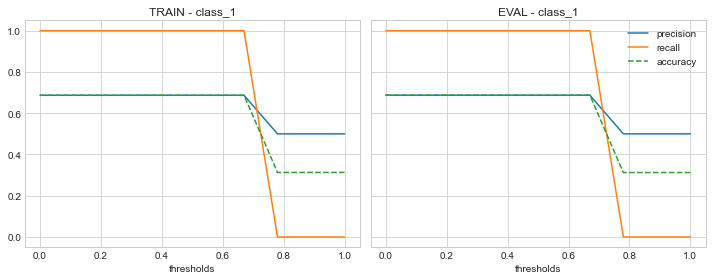

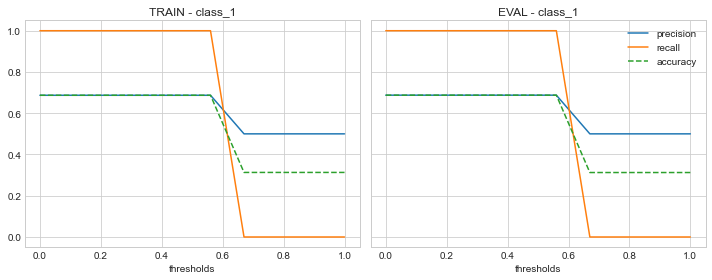

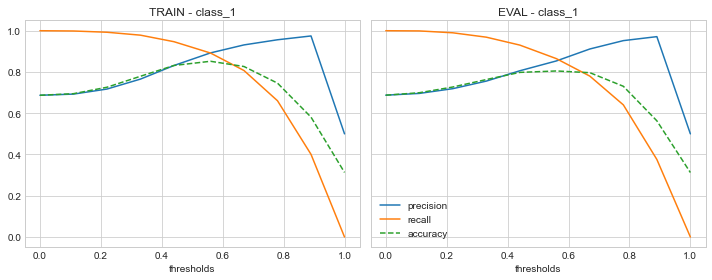

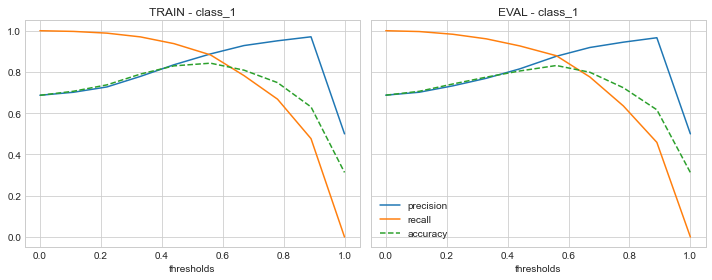

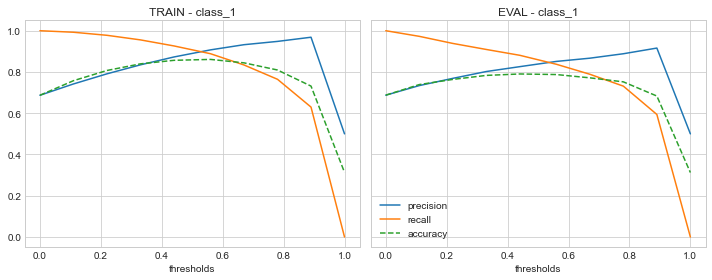

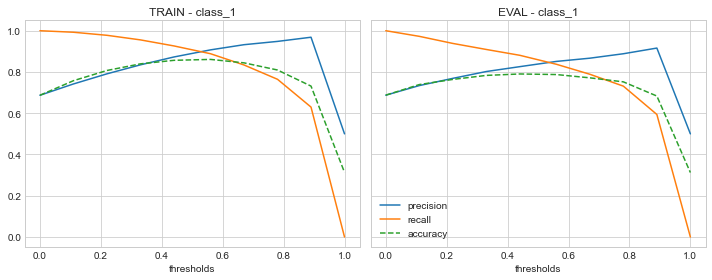

In [44]:
for i in range(trained_models.shape[0]):
    X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
    y_tr_proba = trained_models[i].predict_proba(X_tr)[:, 1]
    y_eval_proba = trained_models[i].predict_proba(X_eval)[:, 1]

    fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)



## TESTING

In [45]:
def fn_pred_proba(model, X):
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X)[:, 1]
    else:  # For model without pred_proba
        prob_pos = model.decision_function(X)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

    return prob_pos

In [253]:
from sklearn.metrics import roc_curve, roc_auc_score
def fn_test_model_binary_clf(df_Xy_, model_, threshold_class_1 = 0.5):
    
    df, model = df_Xy_, model_
    X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values.ravel()
    y_proba =  fn_pred_proba(model, X)

    logloss = log_loss(y, y_proba, labels=model_.classes_)
    acc, prec_0, prec_1, rec_0, rec_1,F1_Measure_0,F1_Measure_1 = fn_acc_prec_rec(y, y_proba, threshold_class_1) 
    
    df = pd.DataFrame().assign(prec = (prec_0, prec_1), rec = (rec_0, rec_1), f1 =(F1_Measure_0,F1_Measure_1) )
    df.index = ['class_' + str(i) for i in range(len(df))]
    
    print(f'LOGLOSS : {round(logloss, 4)}')
    print(f'ACCURACY: {round(acc, 3)}')
    print()

    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y, y_proba)
    print('roc_auc_score: ', roc_auc_score(y, y_proba))
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return df.round(3)

--------------------------------------------------------------------------------------------- 0
LOGLOSS : 0.6931
ACCURACY: 0.313

roc_auc_score:  0.5


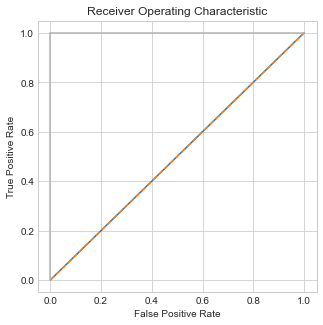

prec  rec     f1
class_0  0.313  1.0  0.000
class_1  0.500  0.0  0.477

---------------------------------------------------------------------------------------------  End of 0
--------------------------------------------------------------------------------------------- 1
LOGLOSS : 0.6377
ACCURACY: 0.687

roc_auc_score:  0.5


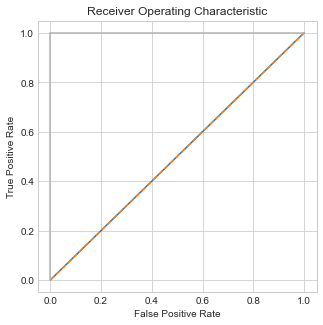

prec  rec     f1
class_0  0.500  0.0  0.814
class_1  0.687  1.0  0.000

---------------------------------------------------------------------------------------------  End of 1
--------------------------------------------------------------------------------------------- 2
LOGLOSS : 0.6931
ACCURACY: 0.687

roc_auc_score:  0.7963381038769065


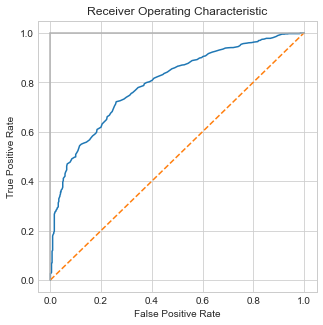

prec  rec     f1
class_0  0.500  0.0  0.814
class_1  0.687  1.0  0.000

---------------------------------------------------------------------------------------------  End of 2
--------------------------------------------------------------------------------------------- 3
LOGLOSS : 0.6377
ACCURACY: 0.687

roc_auc_score:  0.5


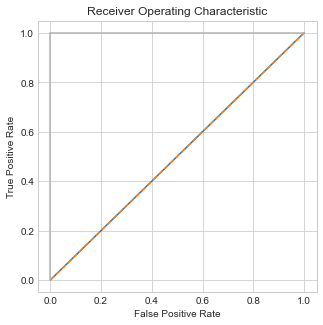

prec  rec     f1
class_0  0.500  0.0  0.814
class_1  0.687  1.0  0.000

---------------------------------------------------------------------------------------------  End of 3
--------------------------------------------------------------------------------------------- 4
LOGLOSS : 0.6177
ACCURACY: 0.687

roc_auc_score:  0.8579531456471589


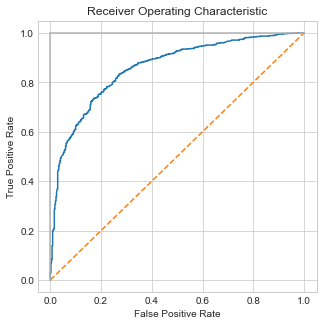

prec  rec     f1
class_0  0.500  0.0  0.814
class_1  0.687  1.0  0.000

---------------------------------------------------------------------------------------------  End of 4
--------------------------------------------------------------------------------------------- 5
LOGLOSS : 0.6376
ACCURACY: 0.687

roc_auc_score:  0.5


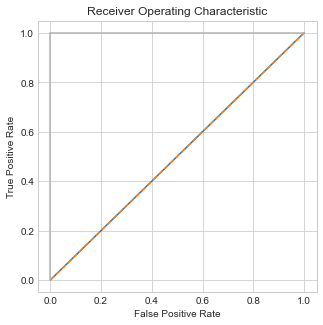

prec  rec     f1
class_0  0.500  0.0  0.814
class_1  0.687  1.0  0.000

---------------------------------------------------------------------------------------------  End of 5
--------------------------------------------------------------------------------------------- 6
LOGLOSS : 0.4234
ACCURACY: 0.809

roc_auc_score:  0.8661862527716186


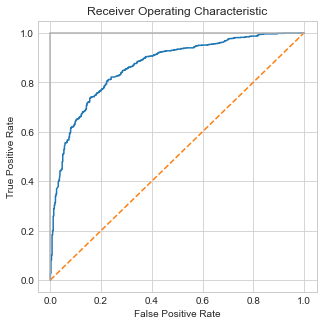

prec    rec     f1
class_0  0.754  0.579  0.868
class_1  0.826  0.914  0.655

---------------------------------------------------------------------------------------------  End of 6
--------------------------------------------------------------------------------------------- 7
LOGLOSS : 0.4175
ACCURACY: 0.818

roc_auc_score:  0.8693486976192076


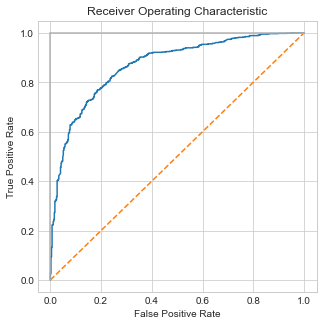

prec    rec     f1
class_0  0.747  0.634  0.872
class_1  0.844  0.902  0.686

---------------------------------------------------------------------------------------------  End of 7
--------------------------------------------------------------------------------------------- 8
LOGLOSS : 0.4961
ACCURACY: 0.786

roc_auc_score:  0.8387052341597796


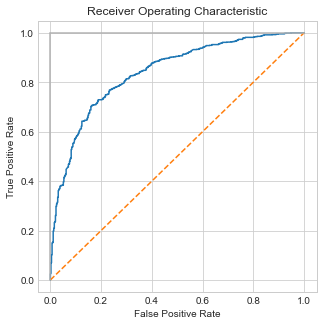

prec    rec     f1
class_0  0.675  0.608  0.847
class_1  0.829  0.867  0.639

---------------------------------------------------------------------------------------------  End of 8
--------------------------------------------------------------------------------------------- 9
LOGLOSS : 0.4961
ACCURACY: 0.786

roc_auc_score:  0.8387052341597796


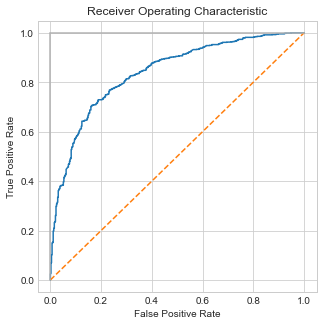

prec    rec     f1
class_0  0.675  0.608  0.847
class_1  0.829  0.867  0.639

---------------------------------------------------------------------------------------------  End of 9


In [254]:
for i in range(trained_models.shape[0]):
    print('---------------------------------------------------------------------------------------------', i )
    model_ = trained_models[i]
    fn_test_model_binary_clf(df_ts, model_, threshold_class_1 = 0.5)
    print('---------------------------------------------------------------------------------------------  End of' , i)


## Random Forest Classifier

### Training

In [152]:
param_grid_r = dict(n_estimators = [50,1000],  
                            min_samples_leaf = [2,4])

param_grid_r = fn_param_grid(param_grid_r)
param_grid_r

## EVALUATION

In [153]:
from sklearn.ensemble import RandomForestClassifier
model_class_r = RandomForestClassifier

trained_models_r = fn_train_models(X_tr, y_tr, model_class_r, param_grid_r)
trained_models_r

100% |########################################################################|


0    (DecisionTreeClassifier(max_features='sqrt', m...
1    (DecisionTreeClassifier(max_features='sqrt', m...
2    (DecisionTreeClassifier(max_features='sqrt', m...
3    (DecisionTreeClassifier(max_features='sqrt', m...
dtype: object

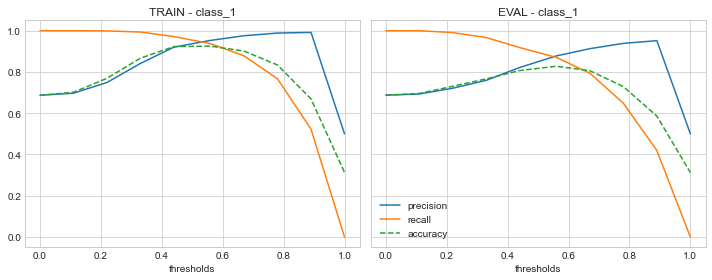

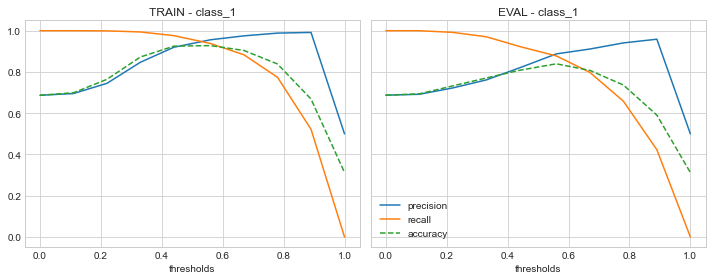

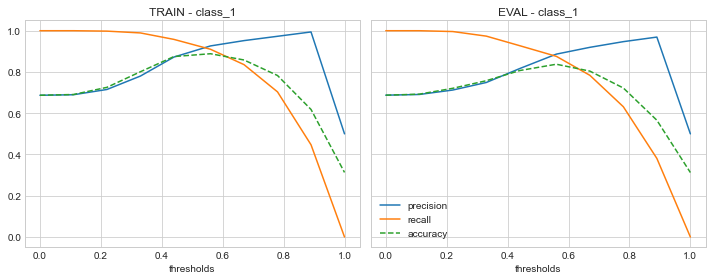

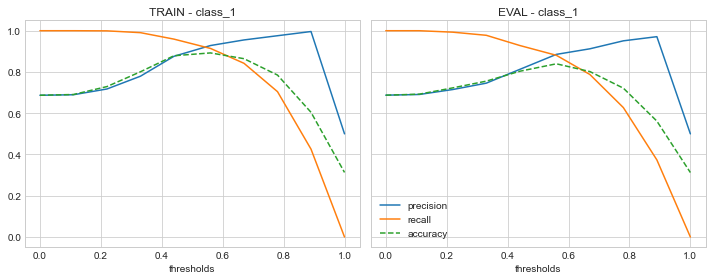

In [154]:
for i in range(trained_models_r.shape[0]):
    X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
    y_tr_proba = trained_models_r[i].predict_proba(X_tr)[:, 1]
    y_eval_proba = trained_models_r[i].predict_proba(X_eval)[:, 1]

    fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

## TESTING

--------------------------------------------------------------------------------------------- 0
LOGLOSS : 0.4176
ACCURACY: 0.802

roc_auc_score:  0.867297139913548


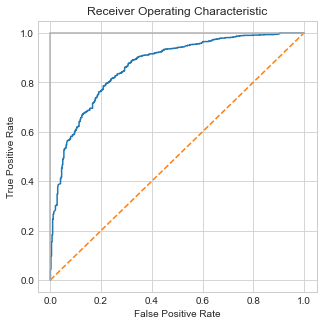

prec    rec     f1
class_0  0.669  0.729  0.853
class_1  0.871  0.835  0.698

---------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------- 1
LOGLOSS : 0.4156
ACCURACY: 0.804

roc_auc_score:  0.8693778136128469


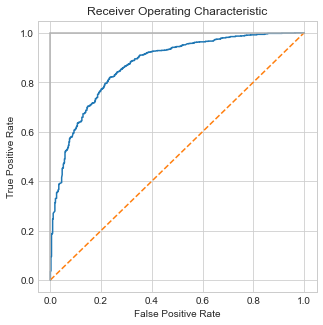

prec    rec     f1
class_0  0.667  0.747  0.854
class_1  0.878  0.830  0.705

---------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------- 2
LOGLOSS : 0.4214
ACCURACY: 0.804

roc_auc_score:  0.8685804833254945


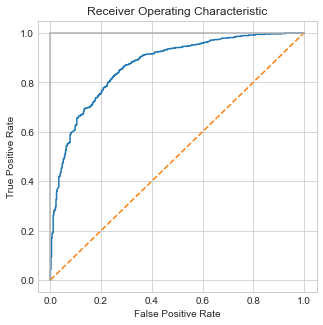

prec    rec     f1
class_0  0.669  0.741  0.854
class_1  0.876  0.833  0.703

---------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------- 3
LOGLOSS : 0.4202
ACCURACY: 0.801

roc_auc_score:  0.8708268942193554


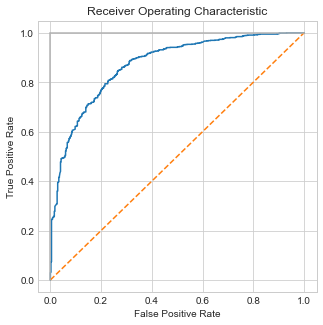

prec    rec     f1
class_0  0.661  0.747  0.851
class_1  0.878  0.825  0.701

---------------------------------------------------------------------------------------------


In [155]:
for i in range(trained_models_r.shape[0]):
    print('---------------------------------------------------------------------------------------------',i)
    model_r = trained_models_r[i]
    fn_test_model_binary_clf(df_ts, model_r, threshold_class_1 = 0.6)
    print('---------------------------------------------------------------------------------------------')

## GradientBoostingClassifier

### Training

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid_gbdt = dict(n_estimators = [50,100],  
                            min_samples_leaf = [2,4],
                           learning_rate =[0.01,0.1,1,10,100])

param_grid_g = fn_param_grid(param_grid_gbdt)
param_grid_g

## EVALUATION

In [157]:
model_class_gbdt = GradientBoostingClassifier
trained_models_gbdt = fn_train_models(X_tr, y_tr, model_class_gbdt, param_grid_g)
trained_models_gbdt

100% |########################################################################|


0     ([DecisionTreeRegressor(criterion='friedman_ms...
1     ([DecisionTreeRegressor(criterion='friedman_ms...
2     ([DecisionTreeRegressor(criterion='friedman_ms...
3     ([DecisionTreeRegressor(criterion='friedman_ms...
4     ([DecisionTreeRegressor(criterion='friedman_ms...
5     ([DecisionTreeRegressor(criterion='friedman_ms...
6     ([DecisionTreeRegressor(criterion='friedman_ms...
7     ([DecisionTreeRegressor(criterion='friedman_ms...
8     ([DecisionTreeRegressor(criterion='friedman_ms...
9     ([DecisionTreeRegressor(criterion='friedman_ms...
10    ([DecisionTreeRegressor(criterion='friedman_ms...
11    ([DecisionTreeRegressor(criterion='friedman_ms...
12    ([DecisionTreeRegressor(criterion='friedman_ms...
13    ([DecisionTreeRegressor(criterion='friedman_ms...
14    ([DecisionTreeRegressor(criterion='friedman_ms...
15    ([DecisionTreeRegressor(criterion='friedman_ms...
16    ([DecisionTreeRegressor(criterion='friedman_ms...
17    ([DecisionTreeRegressor(criterion='friedma

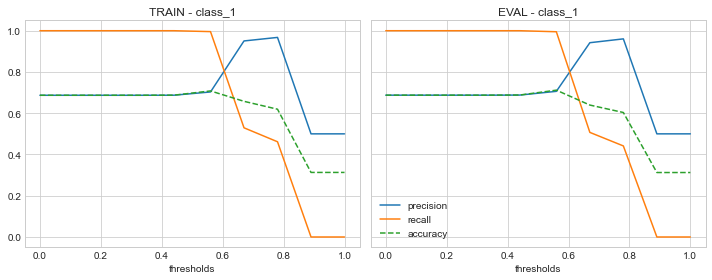

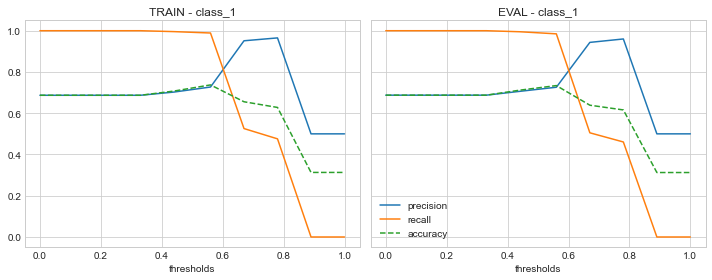

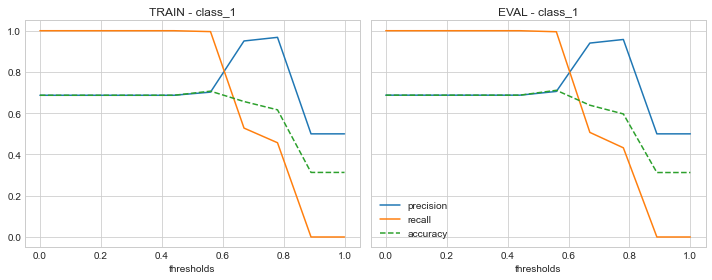

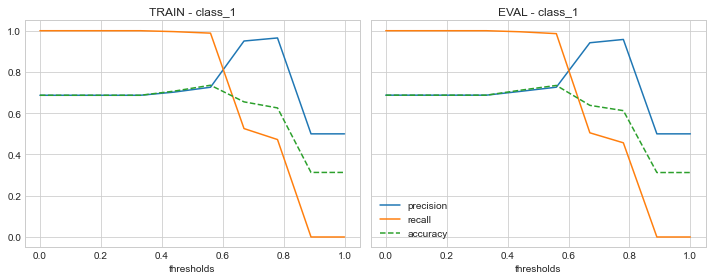

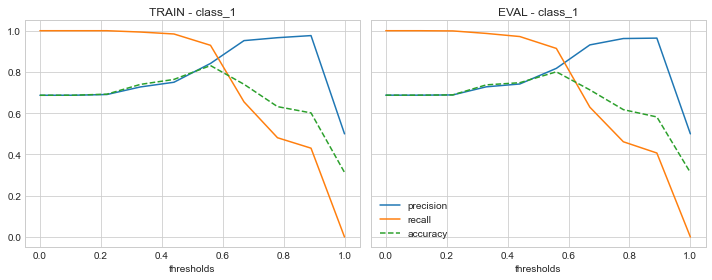

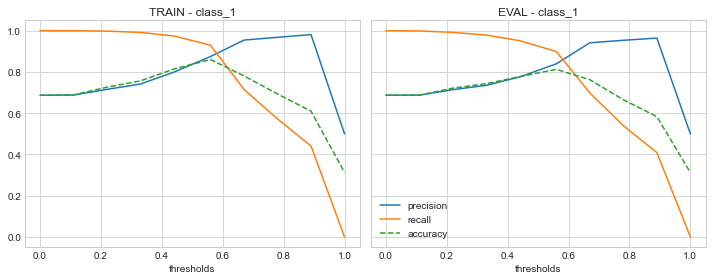

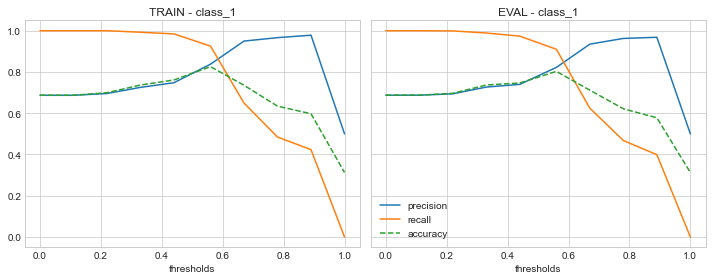

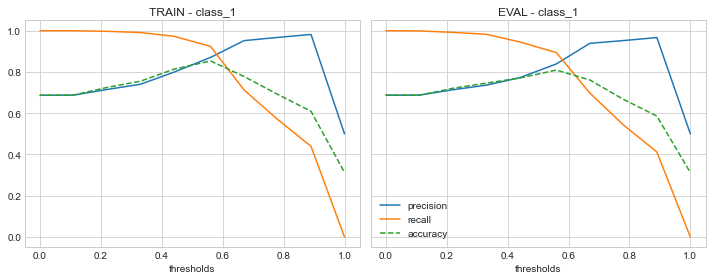

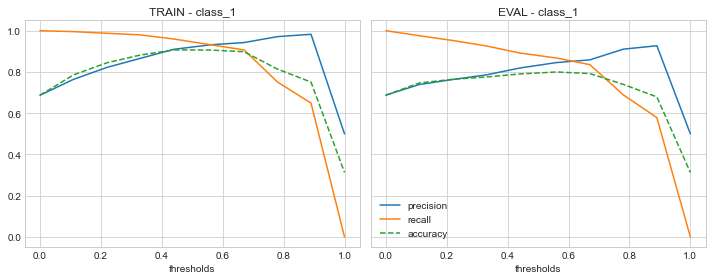

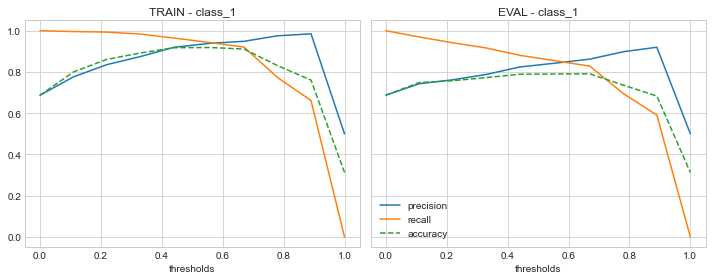

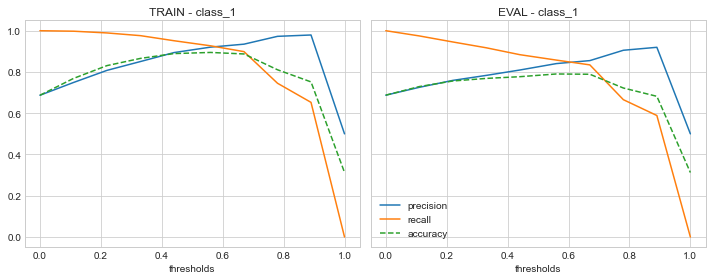

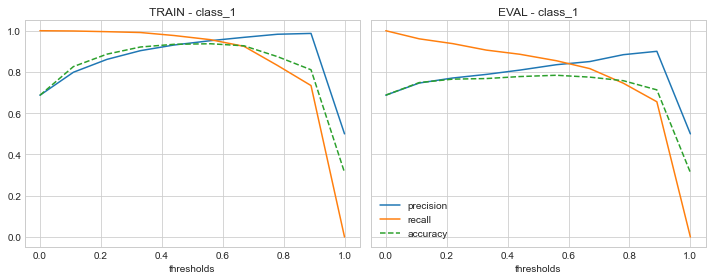

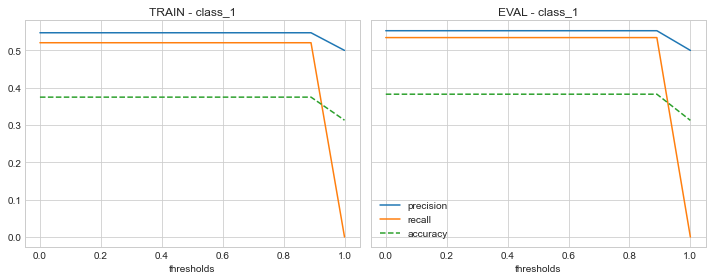

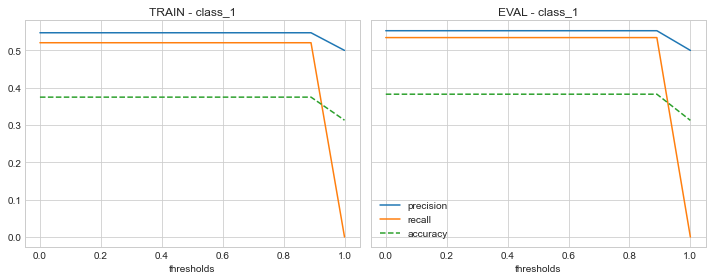

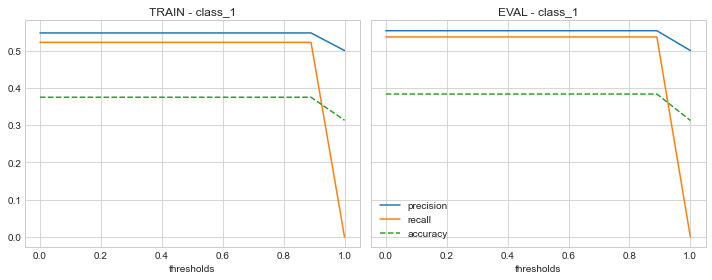

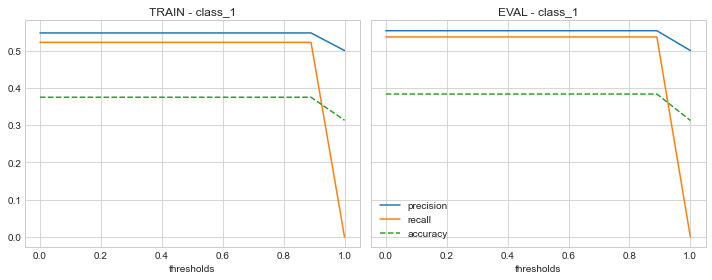

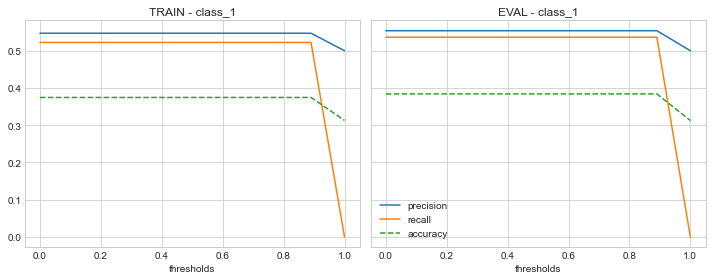

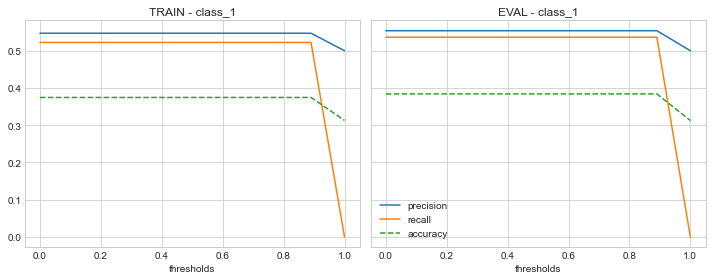

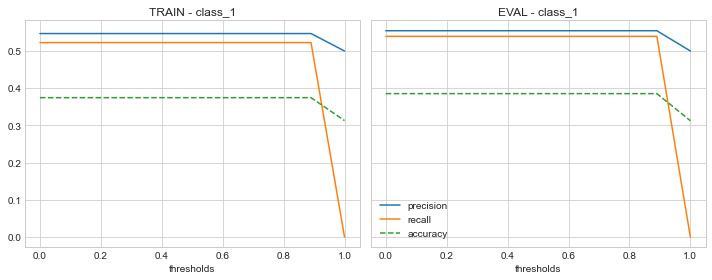

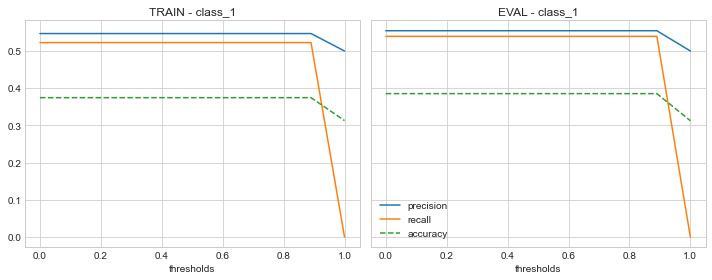

In [158]:
for i in range(trained_models_gbdt.shape[0]):
    X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
    y_tr_proba = trained_models_gbdt[i].predict_proba(X_tr)[:, 1]
    y_eval_proba = trained_models_gbdt[i].predict_proba(X_eval)[:, 1]

    fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

## TESTING

---------------------------------------------------------------------------------------------  0
LOGLOSS : 0.5546
ACCURACY: 0.728

roc_auc_score:  0.760112208560102


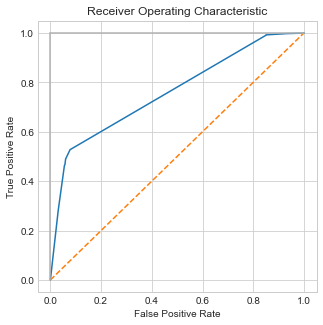

prec    rec     f1
class_0  0.883  0.151  0.833
class_1  0.719  0.991  0.258

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  1
LOGLOSS : 0.524
ACCURACY: 0.745

roc_auc_score:  0.794470200900356


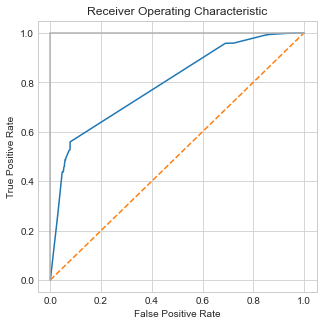

prec    rec     f1
class_0  0.753  0.277  0.838
class_1  0.744  0.959  0.405

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  2
LOGLOSS : 0.554
ACCURACY: 0.729

roc_auc_score:  0.7624840421957938


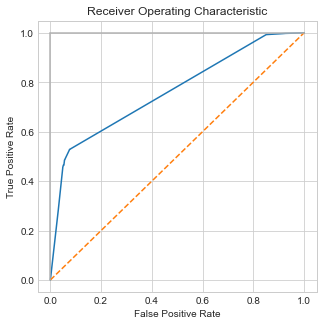

prec    rec     f1
class_0  0.895  0.151  0.834
class_1  0.719  0.992  0.258

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  3
LOGLOSS : 0.5231
ACCURACY: 0.746

roc_auc_score:  0.7954511859168178


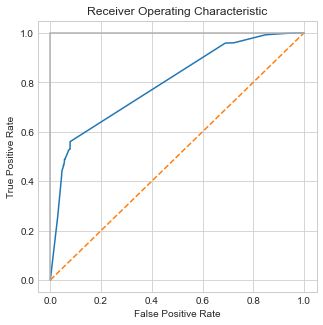

prec    rec     f1
class_0  0.758  0.277  0.838
class_1  0.745  0.960  0.406

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  4
LOGLOSS : 0.4566
ACCURACY: 0.811

roc_auc_score:  0.8535868664471767


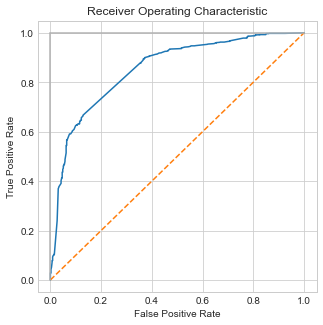

prec    rec     f1
class_0  0.726  0.634  0.866
class_1  0.842  0.891  0.677

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  5
LOGLOSS : 0.4361
ACCURACY: 0.806

roc_auc_score:  0.8621368899639409


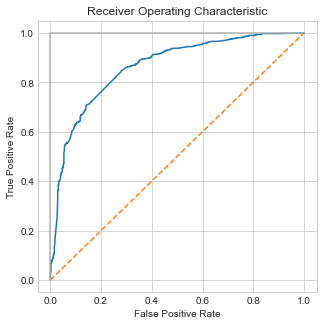

prec    rec     f1
class_0  0.701  0.665  0.861
class_1  0.851  0.871  0.683

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  6
LOGLOSS : 0.4563
ACCURACY: 0.81

roc_auc_score:  0.8548377343277564


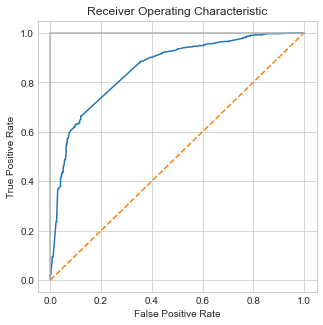

prec    rec     f1
class_0  0.719  0.645  0.865
class_1  0.846  0.885  0.680

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  7
LOGLOSS : 0.4355
ACCURACY: 0.813

roc_auc_score:  0.8625769894062577


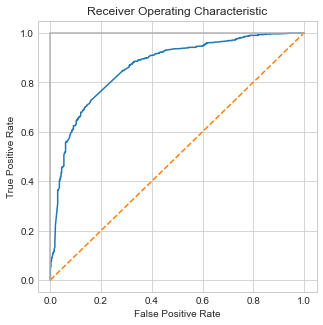

prec    rec     f1
class_0  0.711  0.681  0.865
class_1  0.857  0.874  0.695

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  8
LOGLOSS : 0.5116
ACCURACY: 0.789

roc_auc_score:  0.8346480324307375


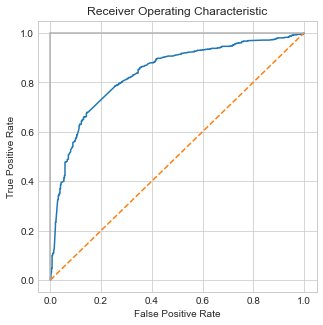

prec    rec     f1
class_0  0.666  0.654  0.847
class_1  0.844  0.851  0.660

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  9
LOGLOSS : 0.5218
ACCURACY: 0.792

roc_auc_score:  0.8299614773007234


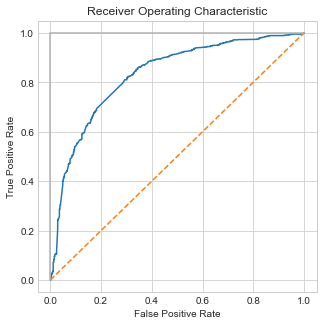

prec    rec     f1
class_0  0.670  0.661  0.849
class_1  0.846  0.852  0.665

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  10
LOGLOSS : 0.4951
ACCURACY: 0.784

roc_auc_score:  0.831195547492665


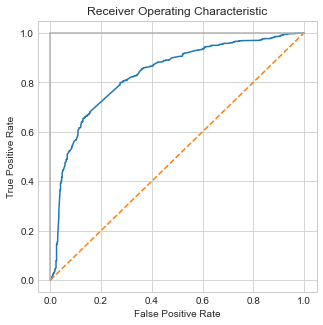

prec    rec     f1
class_0  0.658  0.645  0.844
class_1  0.840  0.847  0.652

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  11
LOGLOSS : 0.5915
ACCURACY: 0.774

roc_auc_score:  0.8190396201482675


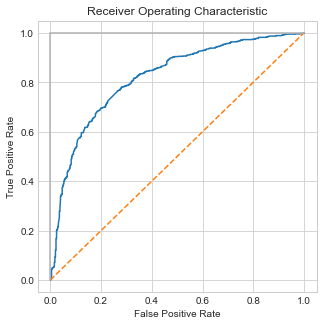

prec    rec     f1
class_0  0.636  0.652  0.835
class_1  0.840  0.830  0.644

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  12
LOGLOSS : 21.8596
ACCURACY: 0.367

roc_auc_score:  0.2834688346883469


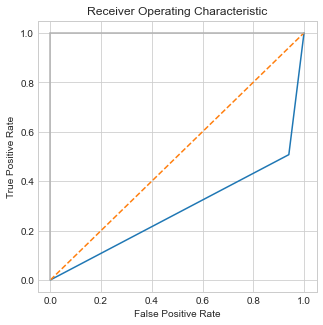

prec    rec     f1
class_0  0.052  0.060  0.524
class_1  0.542  0.507  0.056

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  13
LOGLOSS : 21.8596
ACCURACY: 0.367

roc_auc_score:  0.2834688346883469


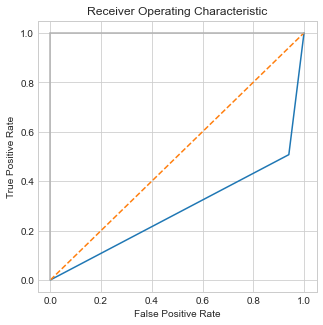

prec    rec     f1
class_0  0.052  0.060  0.524
class_1  0.542  0.507  0.056

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  14
LOGLOSS : 21.8356
ACCURACY: 0.368

roc_auc_score:  0.2839738851933974


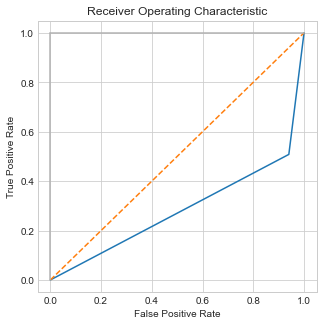

prec    rec     f1
class_0  0.053  0.060  0.525
class_1  0.543  0.508  0.056

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  15
LOGLOSS : 21.8356
ACCURACY: 0.368

roc_auc_score:  0.2839738851933974


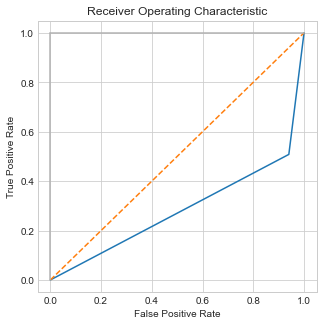

prec    rec     f1
class_0  0.053  0.060  0.525
class_1  0.543  0.508  0.056

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  16
LOGLOSS : 21.7877
ACCURACY: 0.369

roc_auc_score:  0.284380389258438


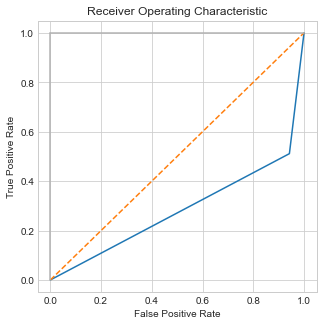

prec    rec     f1
class_0  0.051  0.058  0.527
class_1  0.544  0.511  0.054

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  17
LOGLOSS : 21.7877
ACCURACY: 0.369

roc_auc_score:  0.284380389258438


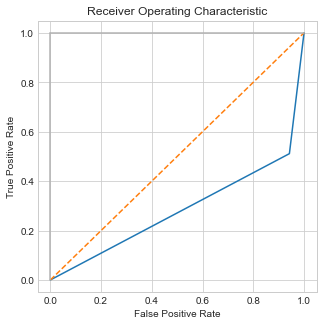

prec    rec     f1
class_0  0.051  0.058  0.527
class_1  0.544  0.511  0.054

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  18
LOGLOSS : 21.8117
ACCURACY: 0.368

roc_auc_score:  0.28447893569844784


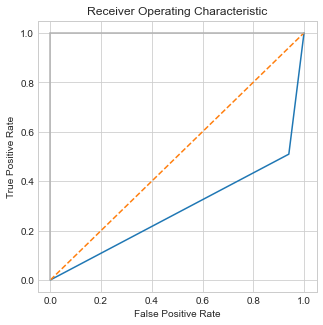

prec    rec     f1
class_0  0.053  0.060  0.526
class_1  0.543  0.509  0.056

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------  19
LOGLOSS : 21.8117
ACCURACY: 0.368

roc_auc_score:  0.28447893569844784


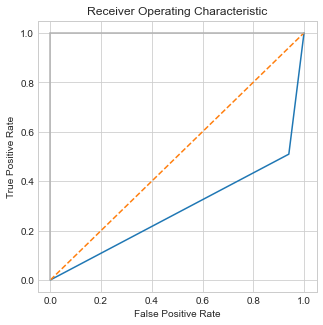

prec    rec     f1
class_0  0.053  0.060  0.526
class_1  0.543  0.509  0.056

---------------------------------------------------------------------------------------------


In [255]:
for i in range(trained_models_gbdt.shape[0]):
    print('--------------------------------------------------------------------------------------------- ', i)
    model_gbdt = trained_models_gbdt[i]
    fn_test_model_binary_clf(df_ts, model_gbdt, threshold_class_1 = 0.6)
    print('---------------------------------------------------------------------------------------------')

## <a name="p4-4">Oversampling with SMOTE Oversampling</a>
- We will use SMOTE Oversampling method to handle the class imbalance

### Plot of distribution of the two classes before Oversampling

Text(0.5, 1.0, ' Distribution of class labels')

Text(0.5, 0, '----------Classes--------')

Text(0, 0.5, 'Count')

<AxesSubplot:title={'center':' Distribution of class labels'}, xlabel='----------Classes--------', ylabel='Count'>

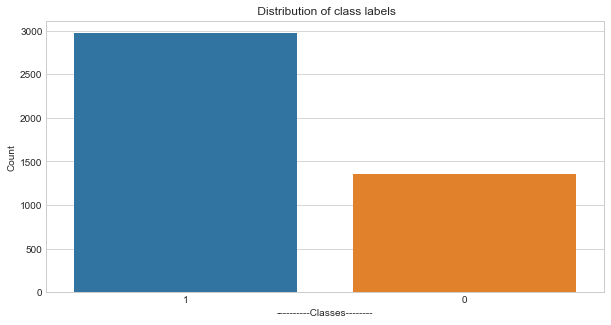

In [160]:
count = [sum(y_tr == 1), sum(y_tr == 0)]
label = ['1', '0']
fig = plt.figure(figsize = (10, 5))
plt.title(" Distribution of class labels")
plt.xlabel("----------Classes--------")
plt.ylabel("Count")
sns.barplot(label,count) 
plt.show()

### Plot of distribution of the two classes After Oversampling

Text(0.5, 1.0, ' Distribution of class labels')

Text(0.5, 0, '----------Classes--------')

Text(0, 0.5, 'Count')

<AxesSubplot:title={'center':' Distribution of class labels'}, xlabel='----------Classes--------', ylabel='Count'>

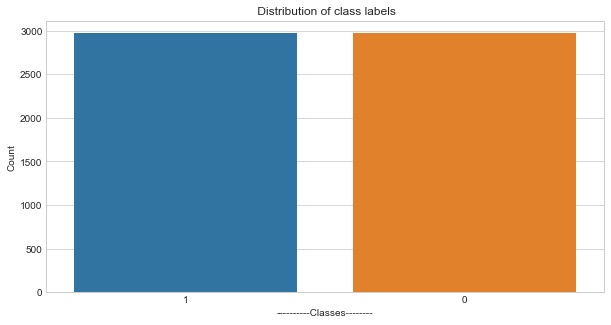

In [161]:
# X_tr, y_tr = df_tr.iloc[:, :-1].values, df_tr.iloc[:, -1].values
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_tr, y_tr)
# counter = Counter(y)
# print(counter)

count = [sum(y == 1), sum(y == 0)]
label = ['1', '0']
fig = plt.figure(figsize = (10, 5))
plt.title(" Distribution of class labels")
plt.xlabel("----------Classes--------")
plt.ylabel("Count")
sns.barplot(label,count) 
plt.show()

## Logistic regression


In [162]:
trained_models_smote = fn_train_models(X, y, model_class, param_grid)

100% |########################################################################|


In [163]:
trained_models_smote

0    LogisticRegression(C=1e-25, max_iter=30000, ra...
1    LogisticRegression(C=1e-25, max_iter=30000, pe...
2    LogisticRegression(C=1e-15, max_iter=30000, ra...
3    LogisticRegression(C=1e-15, max_iter=30000, pe...
4    LogisticRegression(C=0.001, max_iter=30000, ra...
5    LogisticRegression(C=0.001, max_iter=30000, pe...
6    LogisticRegression(max_iter=30000, random_stat...
7    LogisticRegression(max_iter=30000, penalty='l1...
8    LogisticRegression(C=1000000000000000.0, max_i...
9    LogisticRegression(C=1000000000000000.0, max_i...
dtype: object

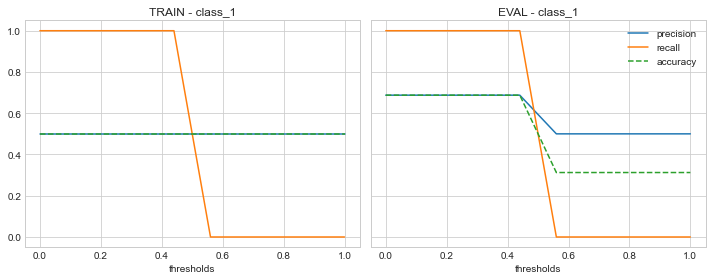

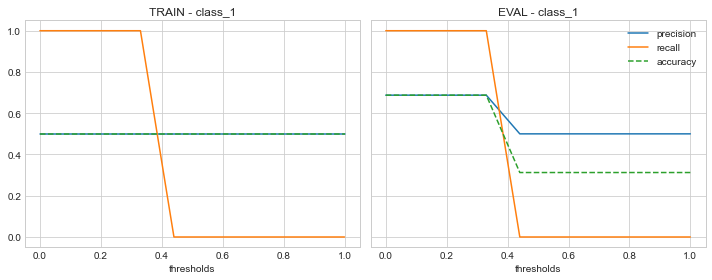

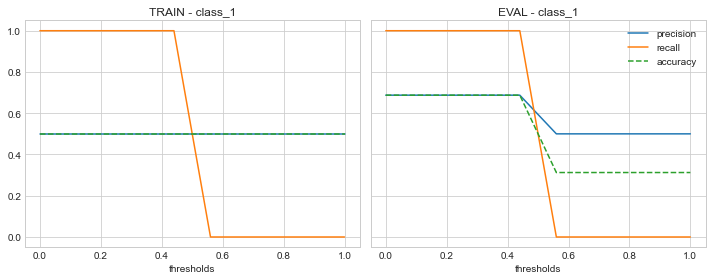

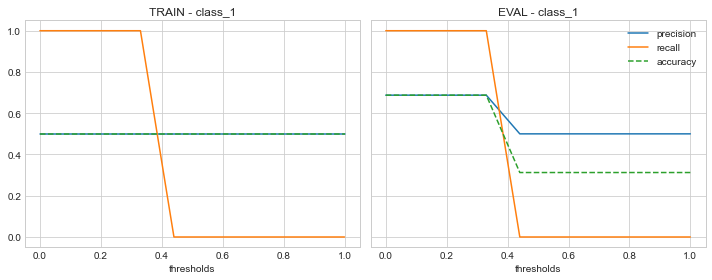

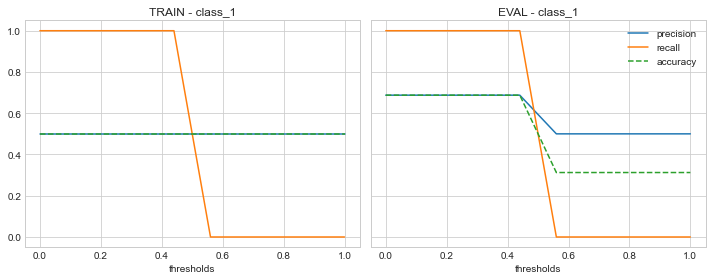

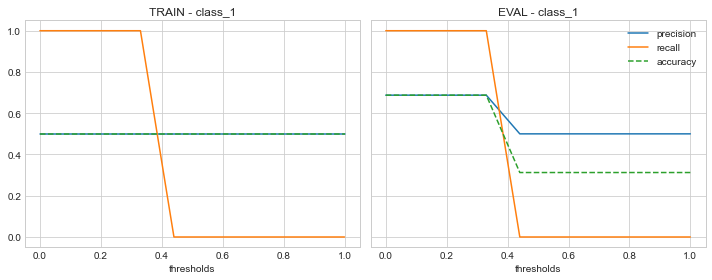

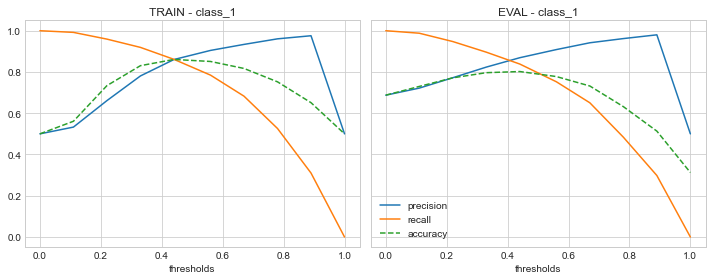

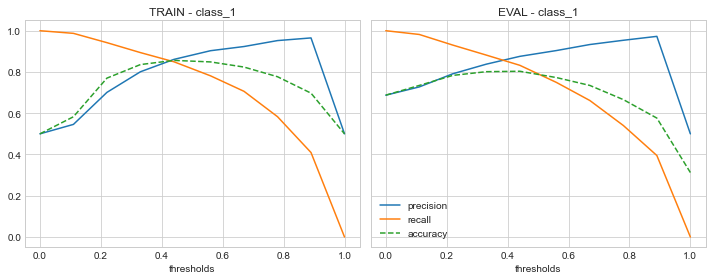

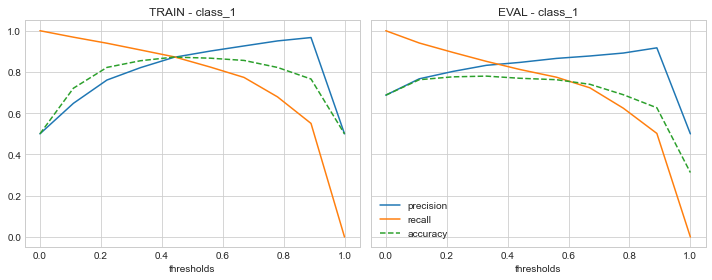

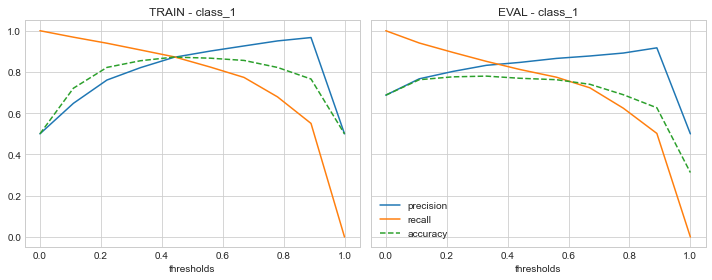

In [164]:
for i in range(trained_models.shape[0]):
    X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
    y_tr_proba = trained_models_smote[i].predict_proba(X)[:, 1]
    y_eval_proba = trained_models_smote[i].predict_proba(X_eval)[:, 1]

    fn_pr_rec_tr_eval(y, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

--------------------------------------------------------------------------------------------- 0
LOGLOSS : 0.6931
ACCURACY: 0.313

roc_auc_score:  0.5


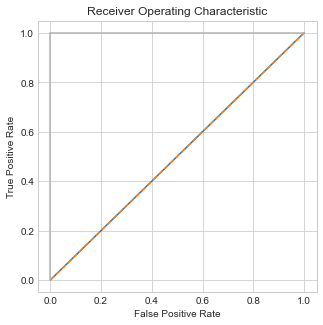

prec  rec     f1
class_0  0.313  1.0  0.000
class_1  0.500  0.0  0.477

---------------------------------------------------------------------------------------------  End of 0
--------------------------------------------------------------------------------------------- 1
LOGLOSS : 0.8412
ACCURACY: 0.313

roc_auc_score:  0.5


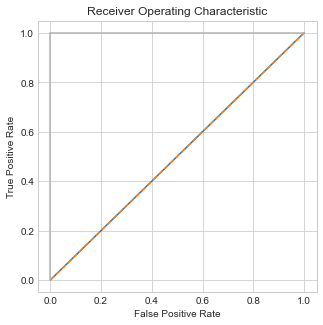

prec  rec     f1
class_0  0.313  1.0  0.000
class_1  0.500  0.0  0.477

---------------------------------------------------------------------------------------------  End of 1
--------------------------------------------------------------------------------------------- 2
LOGLOSS : 0.6931
ACCURACY: 0.313

roc_auc_score:  0.8496147730072342


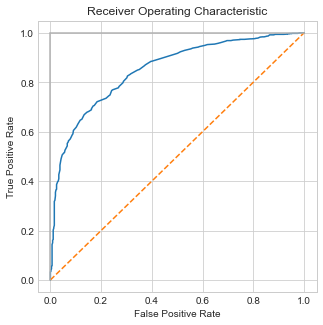

prec  rec     f1
class_0  0.313  1.0  0.000
class_1  0.500  0.0  0.477

---------------------------------------------------------------------------------------------  End of 2
--------------------------------------------------------------------------------------------- 3
LOGLOSS : 0.8412
ACCURACY: 0.313

roc_auc_score:  0.5


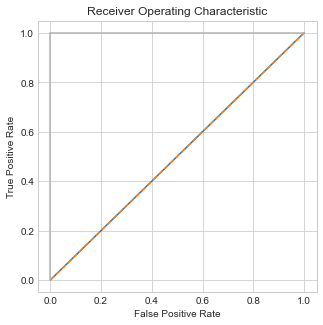

prec  rec     f1
class_0  0.313  1.0  0.000
class_1  0.500  0.0  0.477

---------------------------------------------------------------------------------------------  End of 3
--------------------------------------------------------------------------------------------- 4
LOGLOSS : 0.6863
ACCURACY: 0.751

roc_auc_score:  0.8500963067481915


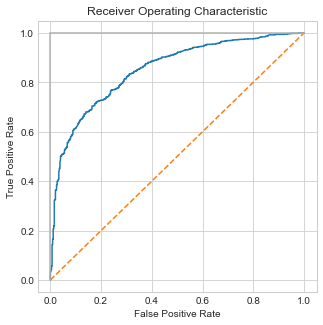

prec    rec     f1
class_0  0.571  0.818  0.799
class_1  0.897  0.720  0.673

---------------------------------------------------------------------------------------------  End of 4
--------------------------------------------------------------------------------------------- 5
LOGLOSS : 0.8413
ACCURACY: 0.313

roc_auc_score:  0.5


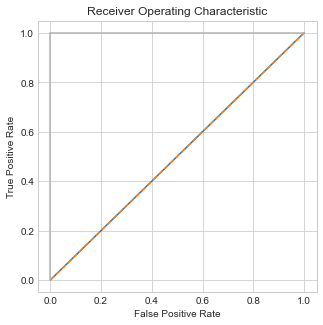

prec  rec     f1
class_0  0.313  1.0  0.000
class_1  0.500  0.0  0.477

---------------------------------------------------------------------------------------------  End of 5
--------------------------------------------------------------------------------------------- 6
LOGLOSS : 0.4533
ACCURACY: 0.788

roc_auc_score:  0.8579688234898877


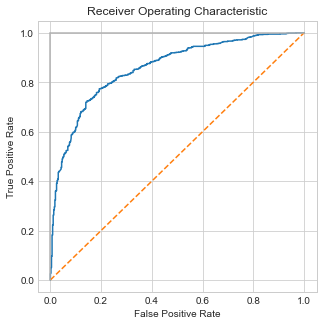

prec    rec     f1
class_0  0.636  0.754  0.839
class_1  0.877  0.803  0.690

---------------------------------------------------------------------------------------------  End of 6
--------------------------------------------------------------------------------------------- 7
LOGLOSS : 0.4591
ACCURACY: 0.777

roc_auc_score:  0.8580416134739859


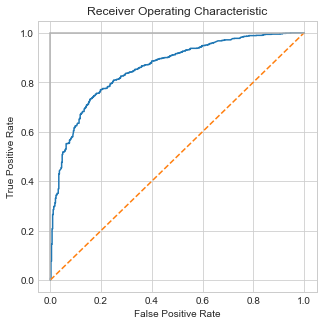

prec    rec     f1
class_0  0.612  0.780  0.827
class_1  0.886  0.775  0.686

---------------------------------------------------------------------------------------------  End of 7
--------------------------------------------------------------------------------------------- 8
LOGLOSS : 0.5505
ACCURACY: 0.767

roc_auc_score:  0.8278964814441532


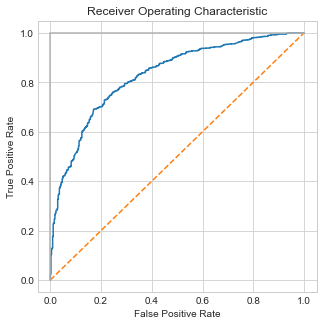

prec    rec     f1
class_0  0.613  0.692  0.825
class_1  0.851  0.801  0.650

---------------------------------------------------------------------------------------------  End of 8
--------------------------------------------------------------------------------------------- 9
LOGLOSS : 0.5505
ACCURACY: 0.767

roc_auc_score:  0.8278964814441532


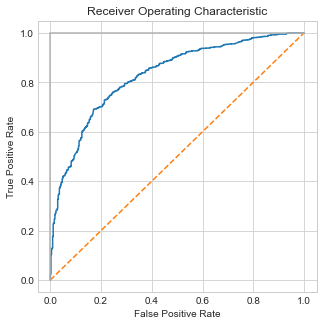

prec    rec     f1
class_0  0.613  0.692  0.825
class_1  0.851  0.801  0.650

---------------------------------------------------------------------------------------------  End of 9


In [256]:
for i in range(trained_models_smote.shape[0]):
    print('---------------------------------------------------------------------------------------------', i )
    model_ = trained_models_smote[i]
    fn_test_model_binary_clf(df_ts, model_, threshold_class_1 = 0.5)
    print('---------------------------------------------------------------------------------------------  End of' , i)


## Random Forest Classifier

In [166]:
trained_models_r_smote = fn_train_models(X, y, model_class_r, param_grid_r)
trained_models_r_smote

100% |########################################################################|


0    (DecisionTreeClassifier(max_features='sqrt', m...
1    (DecisionTreeClassifier(max_features='sqrt', m...
2    (DecisionTreeClassifier(max_features='sqrt', m...
3    (DecisionTreeClassifier(max_features='sqrt', m...
dtype: object

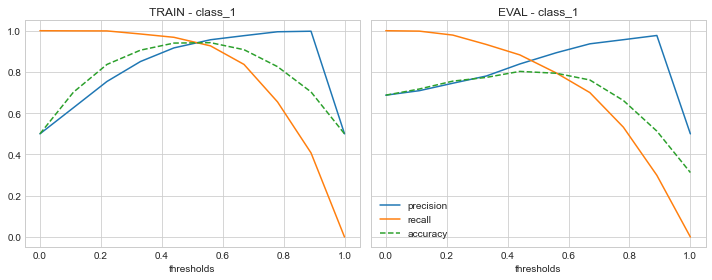

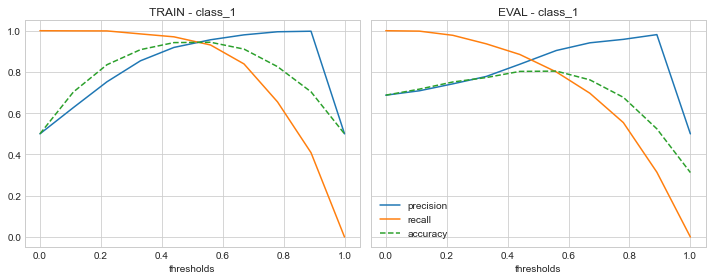

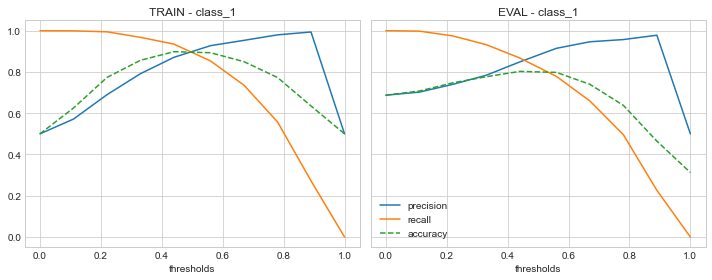

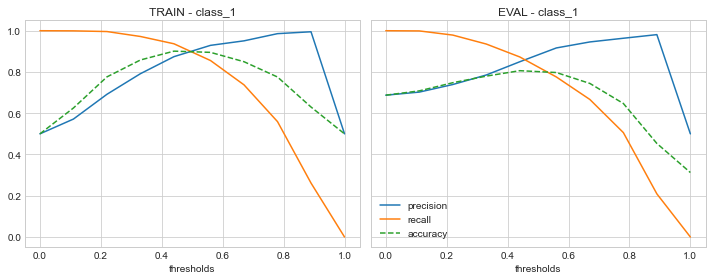

In [167]:
for i in range(trained_models_r.shape[0]):
    y_tr_proba = trained_models_r_smote[i].predict_proba(X)[:, 1]
    y_eval_proba = trained_models_r_smote[i].predict_proba(X_eval)[:, 1]
    fn_pr_rec_tr_eval(y, y_tr_proba, y_eval, y_eval_proba, class_ = 1)



--------------------------------------------------------------------------------------------- 0
LOGLOSS : 0.4382
ACCURACY: 0.734

roc_auc_score:  0.8569228874106922


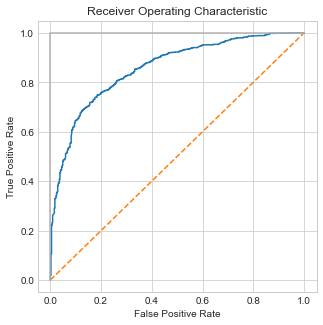

prec    rec     f1
class_0  0.546  0.882  0.774
class_1  0.926  0.666  0.675

---------------------------------------------------------------------------------------------  End of 0
--------------------------------------------------------------------------------------------- 1
LOGLOSS : 0.438
ACCURACY: 0.735

roc_auc_score:  0.857440256220744


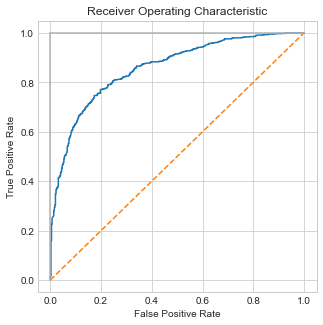

prec    rec     f1
class_0  0.547  0.887  0.775
class_1  0.928  0.666  0.677

---------------------------------------------------------------------------------------------  End of 1
--------------------------------------------------------------------------------------------- 2
LOGLOSS : 0.4502
ACCURACY: 0.717

roc_auc_score:  0.8543394028981612


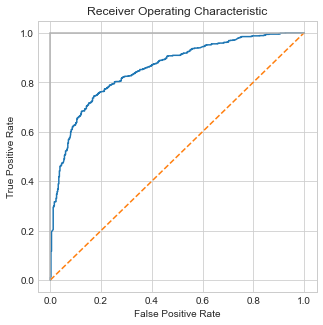

prec    rec     f1
class_0  0.528  0.900  0.755
class_1  0.933  0.633  0.666

---------------------------------------------------------------------------------------------  End of 2
--------------------------------------------------------------------------------------------- 3
LOGLOSS : 0.4506
ACCURACY: 0.718

roc_auc_score:  0.8547257497368362


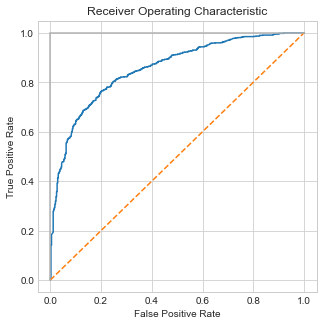

prec    rec     f1
class_0  0.529  0.900  0.756
class_1  0.933  0.635  0.667

---------------------------------------------------------------------------------------------  End of 3


In [258]:
for i in range(trained_models_r_smote.shape[0]):
    print('---------------------------------------------------------------------------------------------', i )
    _smote = trained_models_r_smote[i]
    fn_test_model_binary_clf(df_ts, _smote, threshold_class_1 = 0.7)
    print('---------------------------------------------------------------------------------------------  End of' , i)


## GradientBoostingClassifier

In [169]:
trained_models_gbdt_smote = fn_train_models(X, y, model_class_gbdt, param_grid_g)
trained_models_gbdt_smote

100% |########################################################################|


0     ([DecisionTreeRegressor(criterion='friedman_ms...
1     ([DecisionTreeRegressor(criterion='friedman_ms...
2     ([DecisionTreeRegressor(criterion='friedman_ms...
3     ([DecisionTreeRegressor(criterion='friedman_ms...
4     ([DecisionTreeRegressor(criterion='friedman_ms...
5     ([DecisionTreeRegressor(criterion='friedman_ms...
6     ([DecisionTreeRegressor(criterion='friedman_ms...
7     ([DecisionTreeRegressor(criterion='friedman_ms...
8     ([DecisionTreeRegressor(criterion='friedman_ms...
9     ([DecisionTreeRegressor(criterion='friedman_ms...
10    ([DecisionTreeRegressor(criterion='friedman_ms...
11    ([DecisionTreeRegressor(criterion='friedman_ms...
12    ([DecisionTreeRegressor(criterion='friedman_ms...
13    ([DecisionTreeRegressor(criterion='friedman_ms...
14    ([DecisionTreeRegressor(criterion='friedman_ms...
15    ([DecisionTreeRegressor(criterion='friedman_ms...
16    ([DecisionTreeRegressor(criterion='friedman_ms...
17    ([DecisionTreeRegressor(criterion='friedma

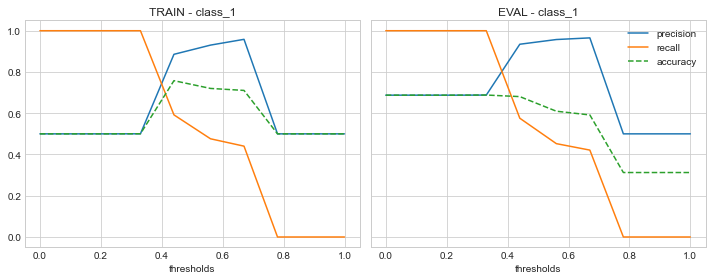

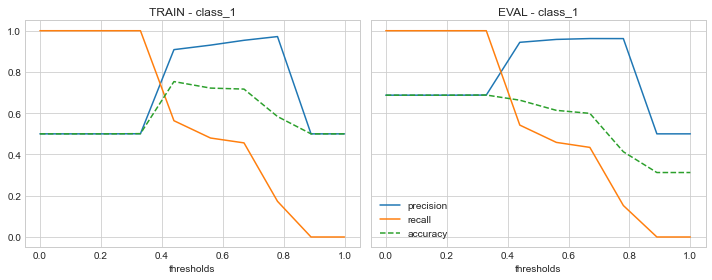

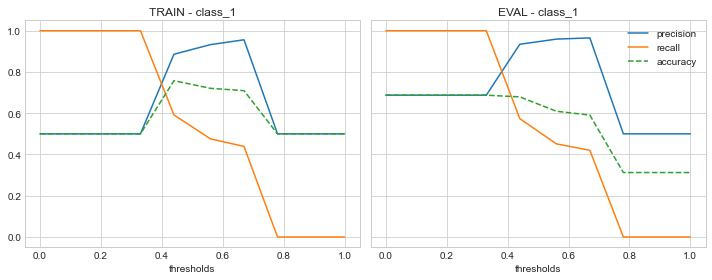

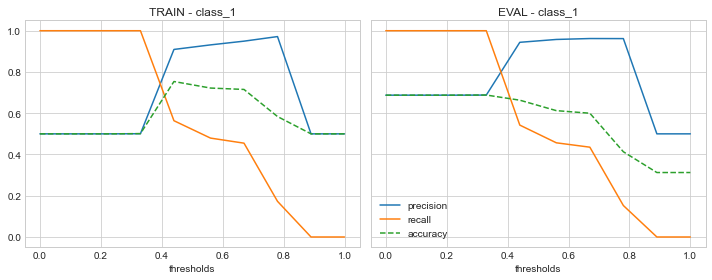

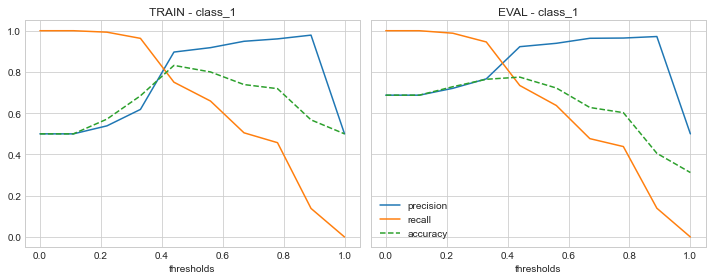

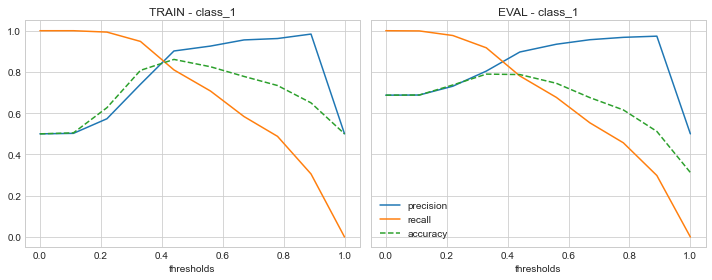

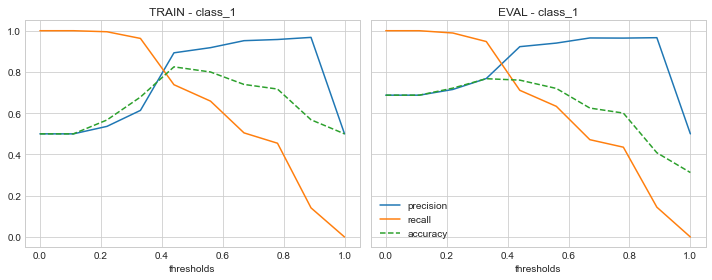

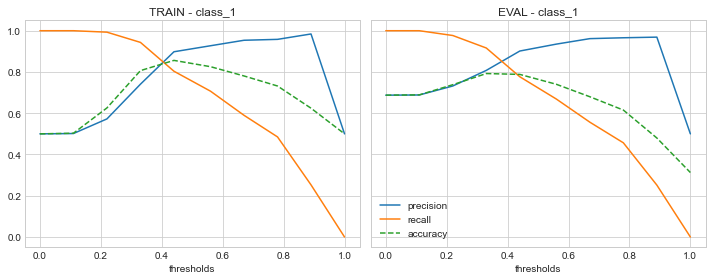

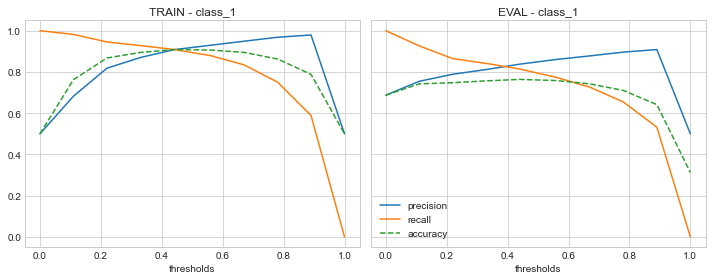

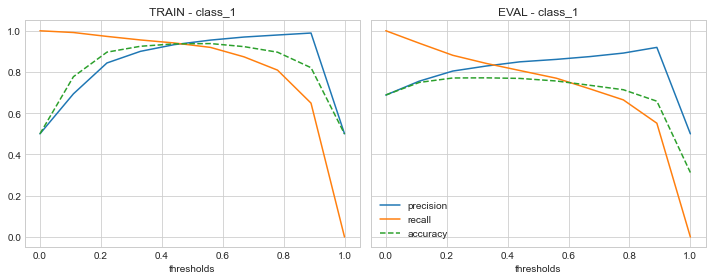

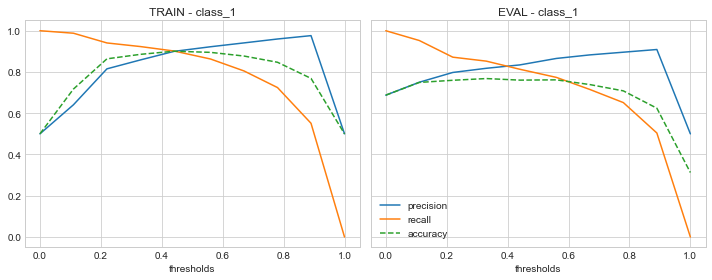

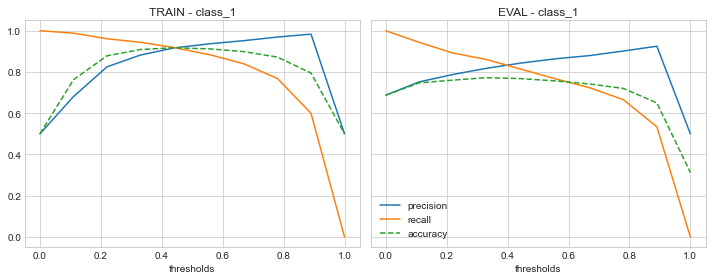

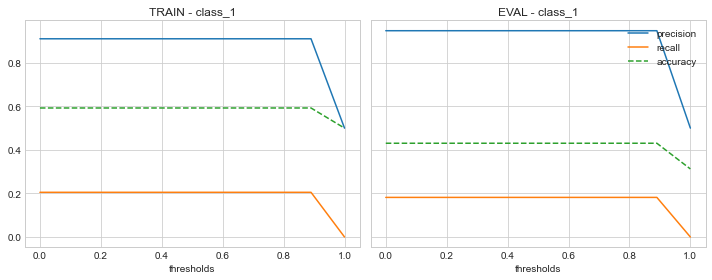

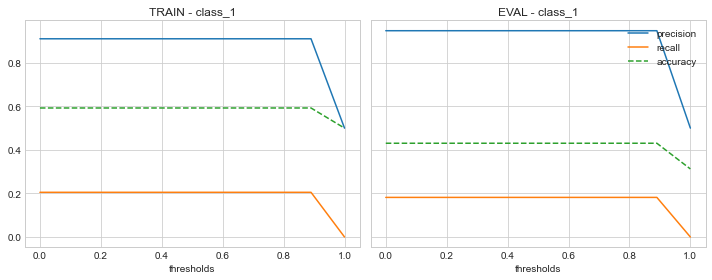

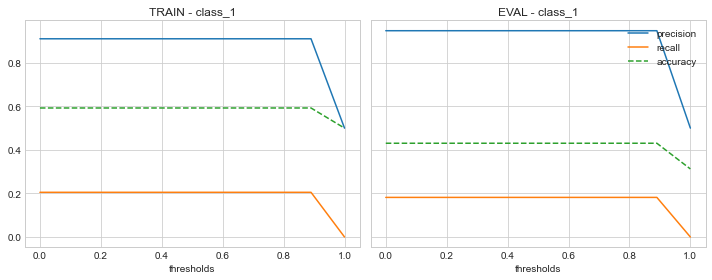

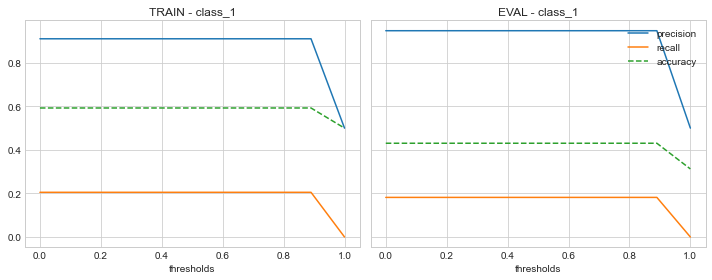

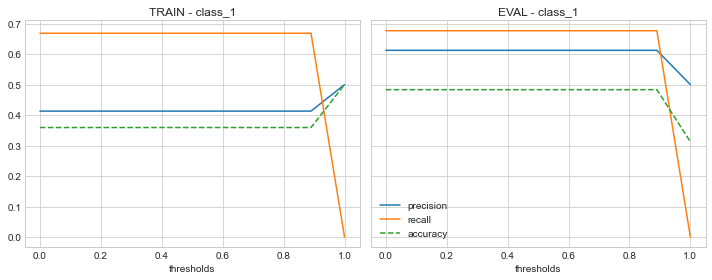

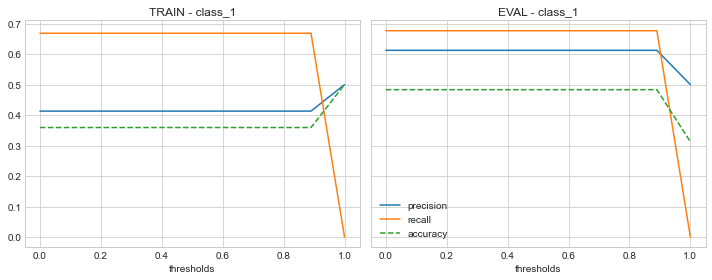

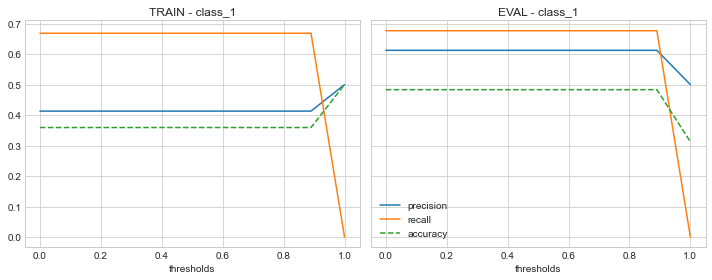

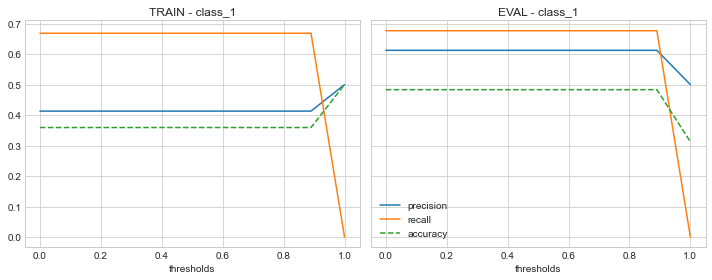

In [170]:
for i in range(trained_models_gbdt_smote.shape[0]):
    X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
    y_tr_proba = trained_models_gbdt_smote[i].predict_proba(X)[:, 1]
    y_eval_proba = trained_models_gbdt_smote[i].predict_proba(X_eval)[:, 1]

    fn_pr_rec_tr_eval(y, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

--------------------------------------------------------------------------------------------- 0
LOGLOSS : 0.6071
ACCURACY: 0.313

roc_auc_score:  0.7711852449103003


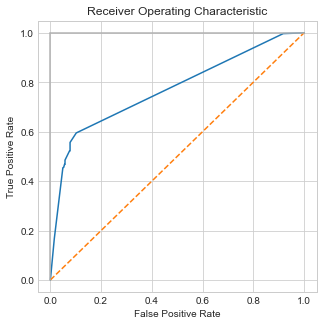

prec  rec     f1
class_0  0.313  1.0  0.000
class_1  0.500  0.0  0.477

---------------------------------------------------------------------------------------------  End of 0
--------------------------------------------------------------------------------------------- 1
LOGLOSS : 0.5708
ACCURACY: 0.613

roc_auc_score:  0.7826591860959932


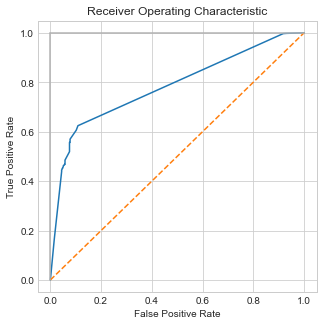

prec    rec     f1
class_0  0.444  0.949  0.620
class_1  0.952  0.460  0.605

---------------------------------------------------------------------------------------------  End of 1
--------------------------------------------------------------------------------------------- 2
LOGLOSS : 0.6072
ACCURACY: 0.313

roc_auc_score:  0.7714327308562341


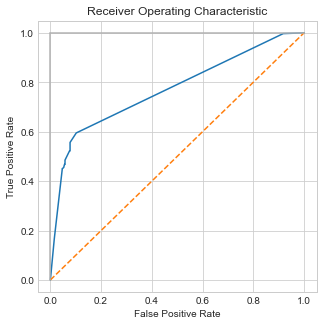

prec  rec     f1
class_0  0.313  1.0  0.000
class_1  0.500  0.0  0.477

---------------------------------------------------------------------------------------------  End of 2
--------------------------------------------------------------------------------------------- 3
LOGLOSS : 0.5709
ACCURACY: 0.612

roc_auc_score:  0.7766411341799367


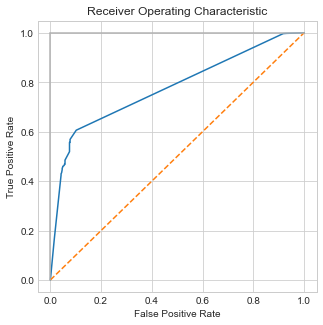

prec    rec     f1
class_0  0.444  0.951  0.618
class_1  0.954  0.458  0.606

---------------------------------------------------------------------------------------------  End of 3
--------------------------------------------------------------------------------------------- 4
LOGLOSS : 0.4979
ACCURACY: 0.629

roc_auc_score:  0.8467658850142219


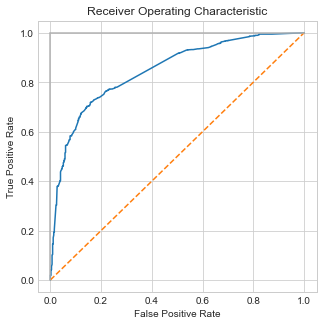

prec    rec     f1
class_0  0.456  0.945  0.643
class_1  0.951  0.486  0.615

---------------------------------------------------------------------------------------------  End of 4
--------------------------------------------------------------------------------------------- 5
LOGLOSS : 0.473
ACCURACY: 0.679

roc_auc_score:  0.8568960111088715


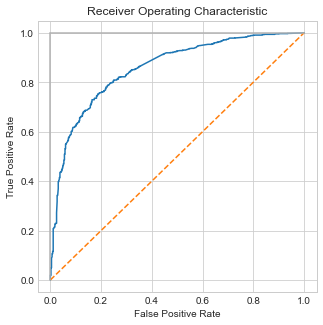

prec    rec     f1
class_0  0.493  0.929  0.707
class_1  0.946  0.565  0.644

---------------------------------------------------------------------------------------------  End of 5
--------------------------------------------------------------------------------------------- 6
LOGLOSS : 0.4985
ACCURACY: 0.631

roc_auc_score:  0.8471051983247105


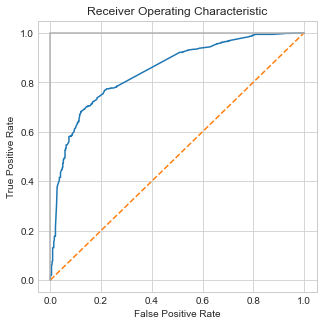

prec    rec     f1
class_0  0.457  0.947  0.644
class_1  0.953  0.487  0.616

---------------------------------------------------------------------------------------------  End of 6
--------------------------------------------------------------------------------------------- 7
LOGLOSS : 0.4741
ACCURACY: 0.677

roc_auc_score:  0.8568444981970481


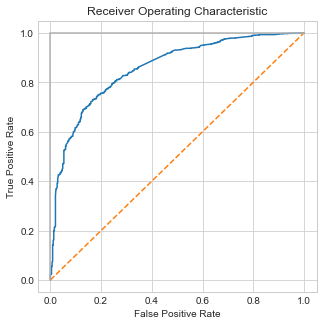

prec    rec     f1
class_0  0.492  0.927  0.706
class_1  0.944  0.564  0.643

---------------------------------------------------------------------------------------------  End of 7
--------------------------------------------------------------------------------------------- 8
LOGLOSS : 0.5886
ACCURACY: 0.734

roc_auc_score:  0.8134045555331586


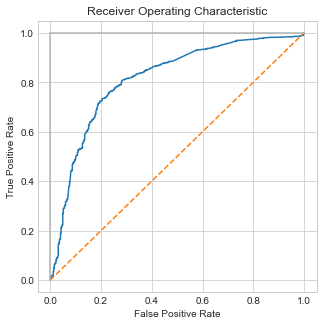

prec    rec     f1
class_0  0.551  0.816  0.783
class_1  0.893  0.697  0.658

---------------------------------------------------------------------------------------------  End of 8
--------------------------------------------------------------------------------------------- 9
LOGLOSS : 0.6389
ACCURACY: 0.727

roc_auc_score:  0.8105444690810545


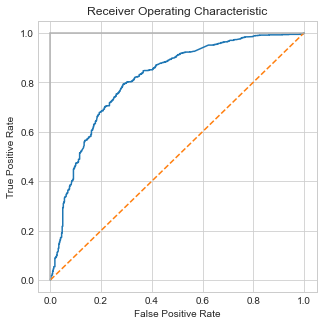

prec    rec     f1
class_0  0.546  0.767  0.781
class_1  0.870  0.709  0.638

---------------------------------------------------------------------------------------------  End of 9
--------------------------------------------------------------------------------------------- 10
LOGLOSS : 0.5581
ACCURACY: 0.731

roc_auc_score:  0.8124728437367019


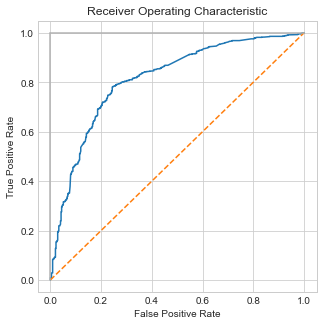

prec    rec     f1
class_0  0.548  0.803  0.781
class_1  0.886  0.699  0.652

---------------------------------------------------------------------------------------------  End of 10
--------------------------------------------------------------------------------------------- 11
LOGLOSS : 0.5915
ACCURACY: 0.727

roc_auc_score:  0.810961051759278


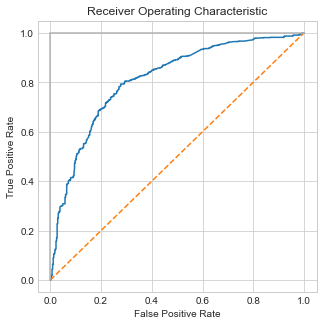

prec    rec     f1
class_0  0.544  0.787  0.778
class_1  0.878  0.699  0.643

---------------------------------------------------------------------------------------------  End of 11
--------------------------------------------------------------------------------------------- 12
LOGLOSS : 19.1989
ACCURACY: 0.444

roc_auc_score:  0.5888149790588815


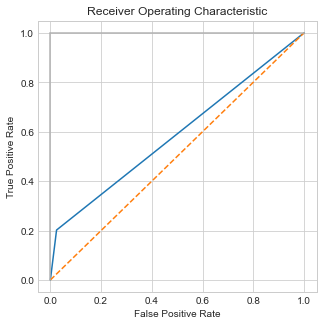

prec    rec     f1
class_0  0.358  0.976  0.333
class_1  0.948  0.202  0.523

---------------------------------------------------------------------------------------------  End of 12
--------------------------------------------------------------------------------------------- 13
LOGLOSS : 19.1989
ACCURACY: 0.444

roc_auc_score:  0.5888149790588815


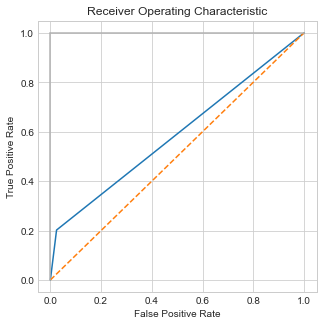

prec    rec     f1
class_0  0.358  0.976  0.333
class_1  0.948  0.202  0.523

---------------------------------------------------------------------------------------------  End of 13
--------------------------------------------------------------------------------------------- 14
LOGLOSS : 19.1989
ACCURACY: 0.444

roc_auc_score:  0.5888149790588815


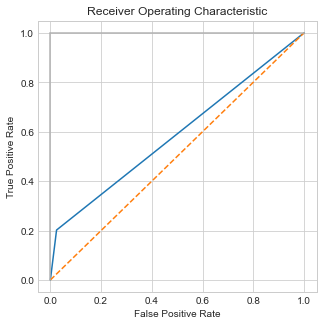

prec    rec     f1
class_0  0.358  0.976  0.333
class_1  0.948  0.202  0.523

---------------------------------------------------------------------------------------------  End of 14
--------------------------------------------------------------------------------------------- 15
LOGLOSS : 19.1989
ACCURACY: 0.444

roc_auc_score:  0.5888149790588815


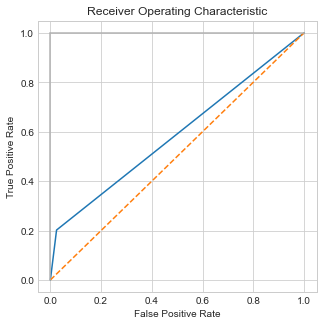

prec    rec     f1
class_0  0.358  0.976  0.333
class_1  0.948  0.202  0.523

---------------------------------------------------------------------------------------------  End of 15
--------------------------------------------------------------------------------------------- 16
LOGLOSS : 17.9048
ACCURACY: 0.482

roc_auc_score:  0.3668021680216802


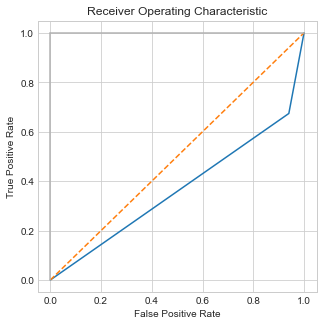

prec    rec     f1
class_0  0.077  0.060  0.641
class_1  0.611  0.674  0.067

---------------------------------------------------------------------------------------------  End of 16
--------------------------------------------------------------------------------------------- 17
LOGLOSS : 17.9048
ACCURACY: 0.482

roc_auc_score:  0.3668021680216802


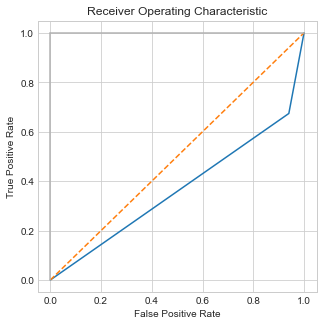

prec    rec     f1
class_0  0.077  0.060  0.641
class_1  0.611  0.674  0.067

---------------------------------------------------------------------------------------------  End of 17
--------------------------------------------------------------------------------------------- 18
LOGLOSS : 17.9048
ACCURACY: 0.482

roc_auc_score:  0.3668021680216802


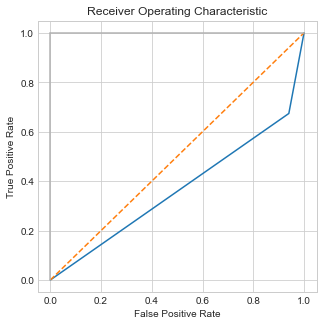

prec    rec     f1
class_0  0.077  0.060  0.641
class_1  0.611  0.674  0.067

---------------------------------------------------------------------------------------------  End of 18
--------------------------------------------------------------------------------------------- 19
LOGLOSS : 17.9048
ACCURACY: 0.482

roc_auc_score:  0.3668021680216802


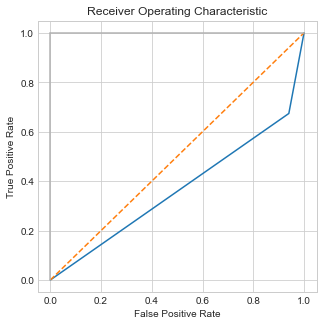

prec    rec     f1
class_0  0.077  0.060  0.641
class_1  0.611  0.674  0.067

---------------------------------------------------------------------------------------------  End of 19


In [257]:
for i in range(trained_models_gbdt_smote.shape[0]):
    print('---------------------------------------------------------------------------------------------', i )
    _smote = trained_models_gbdt_smote[i]
    fn_test_model_binary_clf(df_ts, _smote, threshold_class_1 = 0.7)
    print('---------------------------------------------------------------------------------------------  End of' , i)


## Best model 

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score
def roc_compression(modelName , df_Xy_, model_, threshold_class_1 = 0.5):
    
    df, model = df_Xy_, model_
    X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values.ravel()
    y_proba =  fn_pred_proba(model, X)
    plt.title('Receiver Operating Characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y, y_proba)
    auc = round(roc_auc_score(y, y_proba), 4)
    print('roc_auc_score: ', roc_auc_score(y, y_proba))
    plt.plot(false_positive_rate1,true_positive_rate1,label=modelName+str(auc))
    plt.legend()

### ROC compression - default

roc_auc_score:  0.8693486976192076
roc_auc_score:  0.8722110237631302
roc_auc_score:  0.8625769894062577


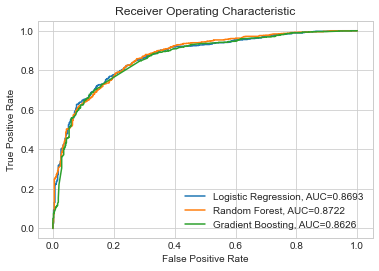

In [239]:
roc_compression("Logistic Regression, AUC=" , df_ts, trained_models[7], threshold_class_1 = 0.7)
roc_compression( "Random Forest, AUC=" , df_ts, model_rf, threshold_class_1 = 0.7)
roc_compression("Gradient Boosting, AUC=",df_ts, trained_models_gbdt[7], threshold_class_1 = 0.7)

roc_auc_score:  0.8579688234898877
roc_auc_score:  0.8547257497368362
roc_auc_score:  0.8568960111088715


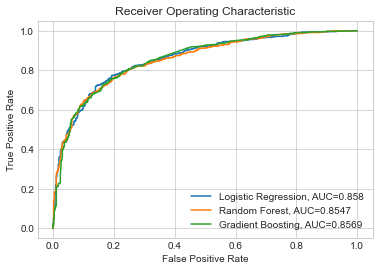

In [249]:
roc_compression("Logistic Regression, AUC=" , df_ts, trained_models_smote[6], threshold_class_1 = 0.7)
roc_compression( "Random Forest, AUC=" , df_ts, trained_models_r_smote[3], threshold_class_1 = 0.7)
roc_compression("Gradient Boosting, AUC=",df_ts, trained_models_gbdt_smote[5], threshold_class_1 = 0.7)

### Prediction 

In [173]:
df_data.sample(5)



Description  y
6314  I was walking home from the stage and a man I ...  1
298   One day a friend of mine was just moving along...  0
5038  One guy standing on the streets threw some wat...  0
6201  Once I was standing at a bus stop. Another gir...  1
75    The incident took place in a bus when two guys...  0

In [174]:
df_data.Description[4210]

'teacher beats pupils'

In [175]:
import joblib
model_tfidf = joblib.load('sexual-harasment-tf-idf')
model_rf = joblib.load('sexual-harasment-model')

In [176]:
input_ = ["my friend was being sexually harassed by someone in a high position. finally she had to leave the job but later she complained to the hr. the hr started to organize workshops after that"]
preprocess_text = fn_preprocess_text(input_)
preprocess_text
input_data_features = model_tfidf.transform([preprocess_text])
prediction = model_rf.predict(input_data_features)
prediction_proba = model_rf.predict_proba(input_data_features)
prediction[0] , prediction_proba[[0]]

'friend sexual harass someon high posit final leav job later complain hr hr start organ workshop'

(1, array([[0.40166713, 0.59833287]]))

In [177]:

preprocess_text = fn_preprocess_text(input_)
preprocess_text
input_data_features = model_tfidf.transform([preprocess_text])
prediction = trained_models[7].predict(input_data_features)
prediction_proba = trained_models[7].predict_proba(input_data_features)
prediction[0] , prediction_proba[[0]]

'friend sexual harass someon high posit final leav job later complain hr hr start organ workshop'

(1, array([[0.49871284, 0.50128716]]))

In [178]:

preprocess_text = fn_preprocess_text(input_)
preprocess_text
input_data_features = model_tfidf.transform([preprocess_text])
prediction = trained_models_smote[7].predict(input_data_features)
prediction_proba = trained_models_smote[7].predict_proba(input_data_features)
prediction[0] , prediction_proba[[0]]

'friend sexual harass someon high posit final leav job later complain hr hr start organ workshop'

(0, array([[0.8444601, 0.1555399]]))

## Observation

We have successfully predicted the “Default Cases”, We have achieved an accuracy of about 80.04%, Log loss of 41.88% and recall of class 0 and 1 as 74% and 82% a roc score of about 87.22 %, Thus, it is concluded that we get better results using Random Forest model trained on without sampled data.